#### Problem statement: Predict a movie’s genre from its title and metadata

In [4]:
import gzip
import pandas as pd

file_path = r"C:\Users\Bhaskar\Git\IMDB Movie Prediction\title.basics.tsv.gz"

with gzip.open(file_path, 'rt', encoding='utf-8') as file:
    
    basic_data = pd.read_csv(file, delimiter='\t', low_memory=False)


basic_data

tconst  titleType               primaryTitle  \
0         tt0000001      short                 Carmencita   
1         tt0000002      short     Le clown et ses chiens   
2         tt0000003      short             Pauvre Pierrot   
3         tt0000004      short                Un bon bock   
4         tt0000005      short           Blacksmith Scene   
...             ...        ...                        ...   
10906498  tt9916848  tvEpisode              Episode #3.17   
10906499  tt9916850  tvEpisode              Episode #3.19   
10906500  tt9916852  tvEpisode              Episode #3.20   
10906501  tt9916856      short                   The Wind   
10906502  tt9916880  tvEpisode  Horrid Henry Knows It All   

                      originalTitle isAdult startYear endYear runtimeMinutes  \
0                        Carmencita       0      1894      \N              1   
1            Le clown et ses chiens       0      1892      \N              5   
2                    Pauvre Pierrot       0      1892      \N              5   
3                       Un bon bock       0      1892      \N             12   
4                  Blacksmith Scene       0      1893      \N              1   
...                             ...     ...       ...     ...            ...   
10906498              Episode #3.17       0      2009      \N             \N   
10906499              Episode #3.19       0      2010      \N             \N   
10906500              Episode #3.20       0      2010      \N             \N   
10906501                   The Wind       0      2015      \N             27   
10906502  Horrid Henry Knows It All       0      2014      \N             10   

                              genres  
0                  Documentary,Short  
1                    Animation,Short  
2           Animation,Comedy,Romance  
3                    Animation,Short  
4                       Comedy,Short  
...                              ...  
10906498         Action,Drama,Family  
10906499         Action,Drama,Family  
10906500         Action,Drama,Family  
10906501                       Short  
10906502  Adventure,Animation,Comedy  

[10906503 rows x 9 columns]

In [5]:
second_file_path = r"C:\Users\Bhaskar\Git\IMDB Movie Prediction\title.akas.tsv.gz"

with gzip.open(second_file_path, 'rt', encoding='utf-8') as file:
    
    title_akas_data = pd.read_csv(file, delimiter='\t', low_memory=False)


# Filtering to US
usa_akas = title_akas_data[title_akas_data['region'] == 'US']

usa_akas

titleId  ordering                                      title  \
2         tt0000001         3                                 Carmencita   
13        tt0000002         6                     The Clown and His Dogs   
38        tt0000005         3                           Blacksmith Scene   
40        tt0000005         5                        Blacksmith Scene #1   
42        tt0000005         7                              Blacksmithing   
...             ...       ...                                        ...   
48865596  tt9916560         2  March of Dimes Presents: Once Upon a Dime   
48865692  tt9916620         2                          The Copeland Case   
48865812  tt9916702         2              Loving London: The Playground   
48865875  tt9916756         2                   Pretty Pretty Black Girl   
48865894  tt9916764         2                                         38   

         region language        types                  attributes  \
2            US       \N  imdbDisplay                          \N   
13           US       \N           \N       literal English title   
38           US       \N  imdbDisplay                          \N   
40           US       \N  alternative                          \N   
42           US       \N           \N  informal alternative title   
...         ...      ...          ...                         ...   
48865596     US       \N  imdbDisplay                          \N   
48865692     US       \N  imdbDisplay                          \N   
48865812     US       \N           \N                          \N   
48865875     US       \N  imdbDisplay                          \N   
48865894     US       \N  imdbDisplay                          \N   

          isOriginalTitle  
2                       0  
13                      0  
38                      0  
40                      0  
42                      0  
...                   ...  
48865596                0  
48865692                0  
48865812                0  
48865875                0  
48865894                0  

[1536841 rows x 8 columns]

In [6]:
file_path = r"C:\Users\Bhaskar\Git\IMDB Movie Prediction\title.ratings.tsv.gz"

with gzip.open(file_path, 'rt', encoding='utf-8') as file:
    
    ratings_data = pd.read_csv(file, delimiter='\t', low_memory=False)


ratings_data

tconst  averageRating  numVotes
0        tt0000001            5.7      2062
1        tt0000002            5.6       279
2        tt0000003            6.5      2030
3        tt0000004            5.4       180
4        tt0000005            6.2      2797
...            ...            ...       ...
1453078  tt9916730            7.0        12
1453079  tt9916766            7.1        23
1453080  tt9916778            7.2        37
1453081  tt9916840            7.2        10
1453082  tt9916880            8.6         8

[1453083 rows x 3 columns]

In [7]:
file_path = r"C:\Users\Bhaskar\Git\IMDB Movie Prediction\title.crew.tsv.gz"

with gzip.open(file_path, 'rt', encoding='utf-8') as file:
    
    crew_data = pd.read_csv(file, delimiter='\t', low_memory=False)


crew_data



tconst            directors  \
0         tt0000001            nm0005690   
1         tt0000002            nm0721526   
2         tt0000003            nm0721526   
3         tt0000004            nm0721526   
4         tt0000005            nm0005690   
...             ...                  ...   
10254620  tt9916848            nm1485677   
10254621  tt9916850            nm1485677   
10254622  tt9916852            nm1485677   
10254623  tt9916856           nm10538645   
10254624  tt9916880  nm0584014,nm0996406   

                                                    writers  
0                                                        \N  
1                                                        \N  
2                                                        \N  
3                                                        \N  
4                                                        \N  
...                                                     ...  
10254620  nm9187127,nm1485677,nm9826385,nm9299459,nm1628284  
10254621            nm9187127,nm1485677,nm9826385,nm1628284  
10254622  nm9187127,nm1485677,nm9826385,nm9299459,nm1628284  
10254623                                          nm6951431  
10254624                                nm1482639,nm2586970  

[10254625 rows x 3 columns]

In [8]:
# title_data = basic_data.merge(usa_akas[['titleId']], left_on ='tconst', right_on='titleId', how='outer')

combined_df = pd.merge(
                    pd.merge(
                    pd.merge(basic_data, usa_akas, left_on='tconst', right_on='titleId', how='inner'), 
                    ratings_data, on='tconst', how='inner'), crew_data, on='tconst', how='inner')

combined_df


tconst  titleType            primaryTitle  \
0       tt0000001      short              Carmencita   
1       tt0000002      short  Le clown et ses chiens   
2       tt0000005      short        Blacksmith Scene   
3       tt0000005      short        Blacksmith Scene   
4       tt0000005      short        Blacksmith Scene   
...           ...        ...                     ...   
595968  tt9916200  tvEpisode    The Great Experiment   
595969  tt9916204  tvEpisode           Better Angels   
595970  tt9916348      video   Ancient World Exposed   
595971  tt9916362      movie                   Coven   
595972  tt9916428      movie     The Secret of China   

                       originalTitle isAdult startYear endYear runtimeMinutes  \
0                         Carmencita       0      1894      \N              1   
1             Le clown et ses chiens       0      1892      \N              5   
2                   Blacksmith Scene       0      1893      \N              1   
3                   Blacksmith Scene       0      1893      \N              1   
4                   Blacksmith Scene       0      1893      \N              1   
...                              ...     ...       ...     ...            ...   
595968          The Great Experiment       0      2019      \N             43   
595969                 Better Angels       0      2019      \N             42   
595970         Ancient World Exposed       0      2019      \N             67   
595971                      Akelarre       0      2020      \N             92   
595972  Hong xing zhao yao Zhong guo       0      2019      \N             \N   

                       genres    titleId  ...                   title region  \
0           Documentary,Short  tt0000001  ...              Carmencita     US   
1             Animation,Short  tt0000002  ...  The Clown and His Dogs     US   
2                Comedy,Short  tt0000005  ...        Blacksmith Scene     US   
3                Comedy,Short  tt0000005  ...     Blacksmith Scene #1     US   
4                Comedy,Short  tt0000005  ...           Blacksmithing     US   
...                       ...        ...  ...                     ...    ...   
595968         Drama,Thriller  tt9916200  ...    The Great Experiment     US   
595969         Drama,Thriller  tt9916204  ...           Better Angels     US   
595970                History  tt9916348  ...   Ancient World Exposed     US   
595971          Drama,History  tt9916362  ...                   Coven     US   
595972  Adventure,History,War  tt9916428  ...     The Secret of China     US   

       language        types                  attributes isOriginalTitle  \
0            \N  imdbDisplay                          \N               0   
1            \N           \N       literal English title               0   
2            \N  imdbDisplay                          \N               0   
3            \N  alternative                          \N               0   
4            \N           \N  informal alternative title               0   
...         ...          ...                         ...             ...   
595968       \N           \N                          \N               0   
595969       \N           \N                          \N               0   
595970       \N  imdbDisplay                          \N               0   
595971       \N  imdbDisplay                          \N               0   
595972       \N  imdbDisplay                          \N               0   

        averageRating  numVotes  directors              writers  
0                 5.7      2062  nm0005690                   \N  
1                 5.6       279  nm0721526                   \N  
2                 6.2      2797  nm0005690                   \N  
3                 6.2      2797  nm0005690                   \N  
4                 6.2      2797  nm0005690                   \N  
...               ...       ...        ...                  ...  
595968            8.1       2

In [9]:
movie_count = combined_df['titleType'].value_counts()['movie']

print(movie_count)

212667


In [10]:
# Checking for null
print(combined_df.isna().sum())

print(combined_df.shape)

tconst             0
titleType          0
primaryTitle       0
originalTitle      0
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres             1
titleId            0
ordering           0
title              0
region             0
language           0
types              0
attributes         0
isOriginalTitle    0
averageRating      0
numVotes           0
directors          0
writers            0
dtype: int64
(595973, 21)


In [11]:
# Dropping null values

drop_missing = combined_df.dropna().reset_index()

drop_missing.isna().sum()

index              0
tconst             0
titleType          0
primaryTitle       0
originalTitle      0
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres             0
titleId            0
ordering           0
title              0
region             0
language           0
types              0
attributes         0
isOriginalTitle    0
averageRating      0
numVotes           0
directors          0
writers            0
dtype: int64

In [12]:
drop_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595972 entries, 0 to 595971
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            595972 non-null  int64  
 1   tconst           595972 non-null  object 
 2   titleType        595972 non-null  object 
 3   primaryTitle     595972 non-null  object 
 4   originalTitle    595972 non-null  object 
 5   isAdult          595972 non-null  object 
 6   startYear        595972 non-null  object 
 7   endYear          595972 non-null  object 
 8   runtimeMinutes   595972 non-null  object 
 9   genres           595972 non-null  object 
 10  titleId          595972 non-null  object 
 11  ordering         595972 non-null  int64  
 12  title            595972 non-null  object 
 13  region           595972 non-null  object 
 14  language         595972 non-null  object 
 15  types            595972 non-null  object 
 16  attributes       595972 non-null  obje

In [13]:
drop_missing.shape

(595972, 22)

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

df = drop_missing

# Converting 'startYear' to numeric, dropping any rows with non-numeric values
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')

df = df.dropna(subset=['startYear'])

# Converting 'runtimeMinutes' to numeric
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')

# Filtering for only 'movie' type entries
df = df[df['titleType'] == 'movie']

# Cleaning up the 'primaryTitle' column
def clean_title(title):
    
    title = title.lower()  # Converting to lowercase
    
    title = ''.join(char for char in title if char.isalnum() or char.isspace())  # Removing punctuation
    
    return title

df['cleanedTitle'] = df['originalTitle'].apply(clean_title)

# Creating a 'titleLength' column for hypothesis testing
df['titleLength'] = df['cleanedTitle'].str.len()

# Creating a 'titleWordCount' column
df['titleWordCount'] = df['cleanedTitle'].str.split().str.len()

pd.set_option('display.max_columns', 210)

df.reset_index()


C:\Users\Bhaskar\AppData\Local\Temp\ipykernel_19484\432870493.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')


level_0   index     tconst titleType                   primaryTitle  \
0            13      13  tt0000009     movie                     Miss Jerry   
1           103     103  tt0000147     movie  The Corbett-Fitzsimmons Fight   
2           268     268  tt0000574     movie    The Story of the Kelly Gang   
3           275     275  tt0000591     movie               The Prodigal Son   
4           290     290  tt0000630     movie                         Hamlet   
...         ...     ...        ...       ...                            ...   
212643   595964  595965  tt9915872     movie           The Last White Witch   
212644   595965  595966  tt9916170     movie                  The Rehearsal   
212645   595966  595967  tt9916190     movie                      Safeguard   
212646   595970  595971  tt9916362     movie                          Coven   
212647   595971  595972  tt9916428     movie            The Secret of China   

                        originalTitle isAdult  startYear endYear  \
0                          Miss Jerry       0     1894.0      \N   
1       The Corbett-Fitzsimmons Fight       0     1897.0      \N   
2         The Story of the Kelly Gang       0     1906.0      \N   
3                   L'enfant prodigue       0     1907.0      \N   
4                              Amleto       0     1908.0      \N   
...                               ...     ...        ...     ...   
212643  Boku no kanojo wa mahoutsukai       0     2019.0      \N   
212644                       O Ensaio       0     2019.0      \N   
212645                      Safeguard       0     2020.0      \N   
212646                       Akelarre       0     2020.0      \N   
212647   Hong xing zhao yao Zhong guo       0     2019.0      \N   

        runtimeMinutes                      genres    titleId  ordering  \
0                 45.0                     Romance  tt0000009         4   
1                100.0      Documentary,News,Sport  tt0000147         2   
2                 70.0  Action,Adventure,Biography  tt0000574         5   
3                 90.0                       Drama  tt0000591         3   
4                  NaN                       Drama  tt0000630         4   
...                ...                         ...        ...       ...   
212643            97.0        Comedy,Drama,Fantasy  tt9915872         3   
212644            51.0                       Drama  tt9916170         3   
212645            95.0   Action,Adventure,Thriller  tt9916190         6   
212646            92.0               Drama,History  tt9916362         6   
212647             NaN       Adventure,History,War  tt9916428         3   

                                title region language        types attributes  \
0                          Miss Jerry     US       \N  imdbDisplay         \N   
1       The Corbett-Fitzsimmons Fight     US       \N  imdbDisplay         \N   
2         The Story of the Kelly Gang     US       \N  imdbDisplay         \N   
3                    The Prodigal Son     US       \N           \N         \N   
4                              Hamlet     US       \N           \N         \N   
...                               ...    ...      ...          ...        ...   
212643           The Last White Witch     US       \N  imdbDisplay         \N   
212644                  The Rehearsal     US       \N  imdbDisplay         \N   
212645                      Safeguard     US       \N  imdbDisplay         \N   
212646                          Coven     US       \N  imdbDisplay         \N   
212647            The Secret of China     US       \N  imdbDisplay         \N   

        isOriginalTitle  averageRating  numVotes  directors  \
0                     0            5.4       212  nm0085156   
1                     0            5.2       518  nm0714557   
2                     0            6.0       914  nm0846879   
3                     0            5.4        27  nm0141150   
4                     0            2.9        27  nm0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212648 entries, 13 to 595971
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            212648 non-null  int64  
 1   tconst           212648 non-null  object 
 2   titleType        212648 non-null  object 
 3   primaryTitle     212648 non-null  object 
 4   originalTitle    212648 non-null  object 
 5   isAdult          212648 non-null  object 
 6   startYear        212648 non-null  float64
 7   endYear          212648 non-null  object 
 8   runtimeMinutes   201479 non-null  float64
 9   genres           212648 non-null  object 
 10  titleId          212648 non-null  object 
 11  ordering         212648 non-null  int64  
 12  title            212648 non-null  object 
 13  region           212648 non-null  object 
 14  language         212648 non-null  object 
 15  types            212648 non-null  object 
 16  attributes       212648 non-null  object 


In [16]:
df['runtimeMinutes'].fillna(df['runtimeMinutes'].mean(), inplace=True)


In [17]:
df.isnull().sum()

index              0
tconst             0
titleType          0
primaryTitle       0
originalTitle      0
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres             0
titleId            0
ordering           0
title              0
region             0
language           0
types              0
attributes         0
isOriginalTitle    0
averageRating      0
numVotes           0
directors          0
writers            0
cleanedTitle       0
titleLength        0
titleWordCount     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212648 entries, 13 to 595971
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            212648 non-null  int64  
 1   tconst           212648 non-null  object 
 2   titleType        212648 non-null  object 
 3   primaryTitle     212648 non-null  object 
 4   originalTitle    212648 non-null  object 
 5   isAdult          212648 non-null  object 
 6   startYear        212648 non-null  float64
 7   endYear          212648 non-null  object 
 8   runtimeMinutes   212648 non-null  float64
 9   genres           212648 non-null  object 
 10  titleId          212648 non-null  object 
 11  ordering         212648 non-null  int64  
 12  title            212648 non-null  object 
 13  region           212648 non-null  object 
 14  language         212648 non-null  object 
 15  types            212648 non-null  object 
 16  attributes       212648 non-null  object 


In [19]:
# Splitting the 'genres' column into a list
df['genresList'] = df['genres'].str.split(',')

# Using MultiLabelBinarizer to create dummy variables for genres
mlb = MultiLabelBinarizer()

genres_dummies = pd.DataFrame(mlb.fit_transform(df['genresList']),
                              
                              columns=mlb.classes_,
                              
                              index=df.index)

# Combining the original dataframe with the new genre dummy variables
df = pd.concat([df, genres_dummies], axis=1)

df.head()

index     tconst titleType                   primaryTitle  \
13      13  tt0000009     movie                     Miss Jerry   
103    103  tt0000147     movie  The Corbett-Fitzsimmons Fight   
268    268  tt0000574     movie    The Story of the Kelly Gang   
275    275  tt0000591     movie               The Prodigal Son   
290    290  tt0000630     movie                         Hamlet   

                     originalTitle isAdult  startYear endYear  runtimeMinutes  \
13                      Miss Jerry       0     1894.0      \N       45.000000   
103  The Corbett-Fitzsimmons Fight       0     1897.0      \N      100.000000   
268    The Story of the Kelly Gang       0     1906.0      \N       70.000000   
275              L'enfant prodigue       0     1907.0      \N       90.000000   
290                         Amleto       0     1908.0      \N       93.066682   

                         genres    titleId  ordering  \
13                      Romance  tt0000009         4   
103      Documentary,News,Sport  tt0000147         2   
268  Action,Adventure,Biography  tt0000574         5   
275                       Drama  tt0000591         3   
290                       Drama  tt0000630         4   

                             title region language        types attributes  \
13                      Miss Jerry     US       \N  imdbDisplay         \N   
103  The Corbett-Fitzsimmons Fight     US       \N  imdbDisplay         \N   
268    The Story of the Kelly Gang     US       \N  imdbDisplay         \N   
275               The Prodigal Son     US       \N           \N         \N   
290                         Hamlet     US       \N           \N         \N   

     isOriginalTitle  averageRating  numVotes  directors    writers  \
13                 0            5.4       212  nm0085156  nm0085156   
103                0            5.2       518  nm0714557         \N   
268                0            6.0       914  nm0846879  nm0846879   
275                0            5.4        27  nm0141150  nm0141150   
290                0            2.9        27  nm0143333  nm0000636   

                     cleanedTitle  titleLength  titleWordCount  \
13                     miss jerry           10               2   
103  the corbettfitzsimmons fight           28               3   
268   the story of the kelly gang           27               6   
275              lenfant prodigue           16               2   
290                        amleto            6               1   

                         genresList  Action  Adult  Adventure  Animation  \
13                        [Romance]       0      0          0          0   
103      [Documentary, News, Sport]       0      0          0          0   
268  [Action, Adventure, Biography]       1      0          1          0   
275                         [Drama]       0      0          0          0   
290                         [Drama]       0      0          0          0   

     Biography  Comedy  Crime  Documentary  Drama  Family  Fantasy  Film-Noir  \
13           0       0      0            0      0       0        0          0   
103          0       0      0            1      0       0        0          0   
268          1       0      0            0      0       0        0          0   
275          0       0      0            0      1       0        0          0   
290          0       0      0            0      1       0        0          0   

     Game-Show  History  Horror  Music  Musical  Mystery  News  Reality-TV  \
13           0        0       0      0        0        0     0           0   
103          0        0       0      0        0        0     1           0   
268          0        0       0      0        0        0     0           0   
275          0        0       0      0        0        0     0           0   
290          0        0       0      0        0        0     0           0   

     Romance  Sci-Fi  Sport  Talk-Show  Thriller  War  Western  \N  
13       

In [20]:
df.info()

# # Selecting only needed columns

# remove_columns = df[['tconst','titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'endYear',
#                     'genres', 'genresList']]

# df = df.drop(columns = remove_columns)

# df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 212648 entries, 13 to 595971
Data columns (total 54 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            212648 non-null  int64  
 1   tconst           212648 non-null  object 
 2   titleType        212648 non-null  object 
 3   primaryTitle     212648 non-null  object 
 4   originalTitle    212648 non-null  object 
 5   isAdult          212648 non-null  object 
 6   startYear        212648 non-null  float64
 7   endYear          212648 non-null  object 
 8   runtimeMinutes   212648 non-null  float64
 9   genres           212648 non-null  object 
 10  titleId          212648 non-null  object 
 11  ordering         212648 non-null  int64  
 12  title            212648 non-null  object 
 13  region           212648 non-null  object 
 14  language         212648 non-null  object 
 15  types            212648 non-null  object 
 16  attributes       212648 non-null  object 


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

# Install nltk
%pip install nltk

import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')

# Creating a list of all genres
genres = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
          
          'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 
          
          'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# Defining function to get most common words for a specific genre
def get_top_words(df, genre, n=10, min_word_length=4):
    
    genre_titles = df[df[genre] == 1]['cleanedTitle']
    
    # English stop words
    english_stop_words = set(stopwords.words('english'))

    # Custom stop words
    custom_stop_words = {'del', 'il', 'un', 'die', 'la', 'el', 'en', 'le', 'der', 'das', 'les'}

    # Combining the two sets
    all_stop_words = list(english_stop_words.union(custom_stop_words)) # converting to a list
    
    vectorizer = CountVectorizer(stop_words=all_stop_words, token_pattern=r'\b[a-zA-Z]{%d,}\b' % min_word_length)

    
    X = vectorizer.fit_transform(genre_titles)
    
    words = vectorizer.get_feature_names_out()
    
    counts = X.sum(axis=0).A1
    
    word_freq = dict(zip(words, counts))
    
    return Counter(word_freq).most_common(n)

# Analyzing word frequency for each genre
genre_top_words = {genre: get_top_words(df, genre) for genre in genres}


for genre, top_words in genre_top_words.items():
    
    print(f"\nTop 10 words in {genre} titles:")
    
    for word, count in top_words:
        
        print(f"{word}: {count}")



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Top 10 words in Action titles:
long: 209
black: 193
dead: 190
movie: 188
death: 175
last: 173
kill: 164
star: 152
blood: 145
ying: 139

Top 10 words in Adult titles:
love: 168
girls: 161
teenage: 81
little: 73
blue: 66
sweet: 57
sexual: 53
young: 53
night: 50
lust: 46

Top 10 words in Adventure titles:
movie: 243
lost: 161
star: 157
adventures: 155
island: 129
jungle: 129
adventure: 126
world: 126
king: 120
last: 118

Top 10 words in Animation titles:
movie: 248
gekijouban: 83
eiga: 60
adventure: 54
doraemon: 43
dragon: 43
nobita: 42
senshi: 40
little: 38
meitantei: 38

Top 10 words in Biography titles:
story: 303
life: 178
american: 83
love: 75
king: 59
last: 57
world: 47
john: 43
great: 38
girl: 37

Top 10 words in Comedy titles:
love: 918
movie: 597
night: 397
girl: 390
christmas: 301
life: 297
girls: 290
little: 279
american: 253
dead: 250

Top 10 words in Crime titles:
night: 236
murder: 209
house: 146
dead: 144
black: 143
city: 141
death: 140
girl: 135
kill: 135
dark: 132

Top 1

Hypothesis #1:
- Title word composition hypothesis:
Certain words or phrases in movie titles are strongly associated with specific genres. For example, titles containing words like "dead" or "blood" are more likely to be Horror.

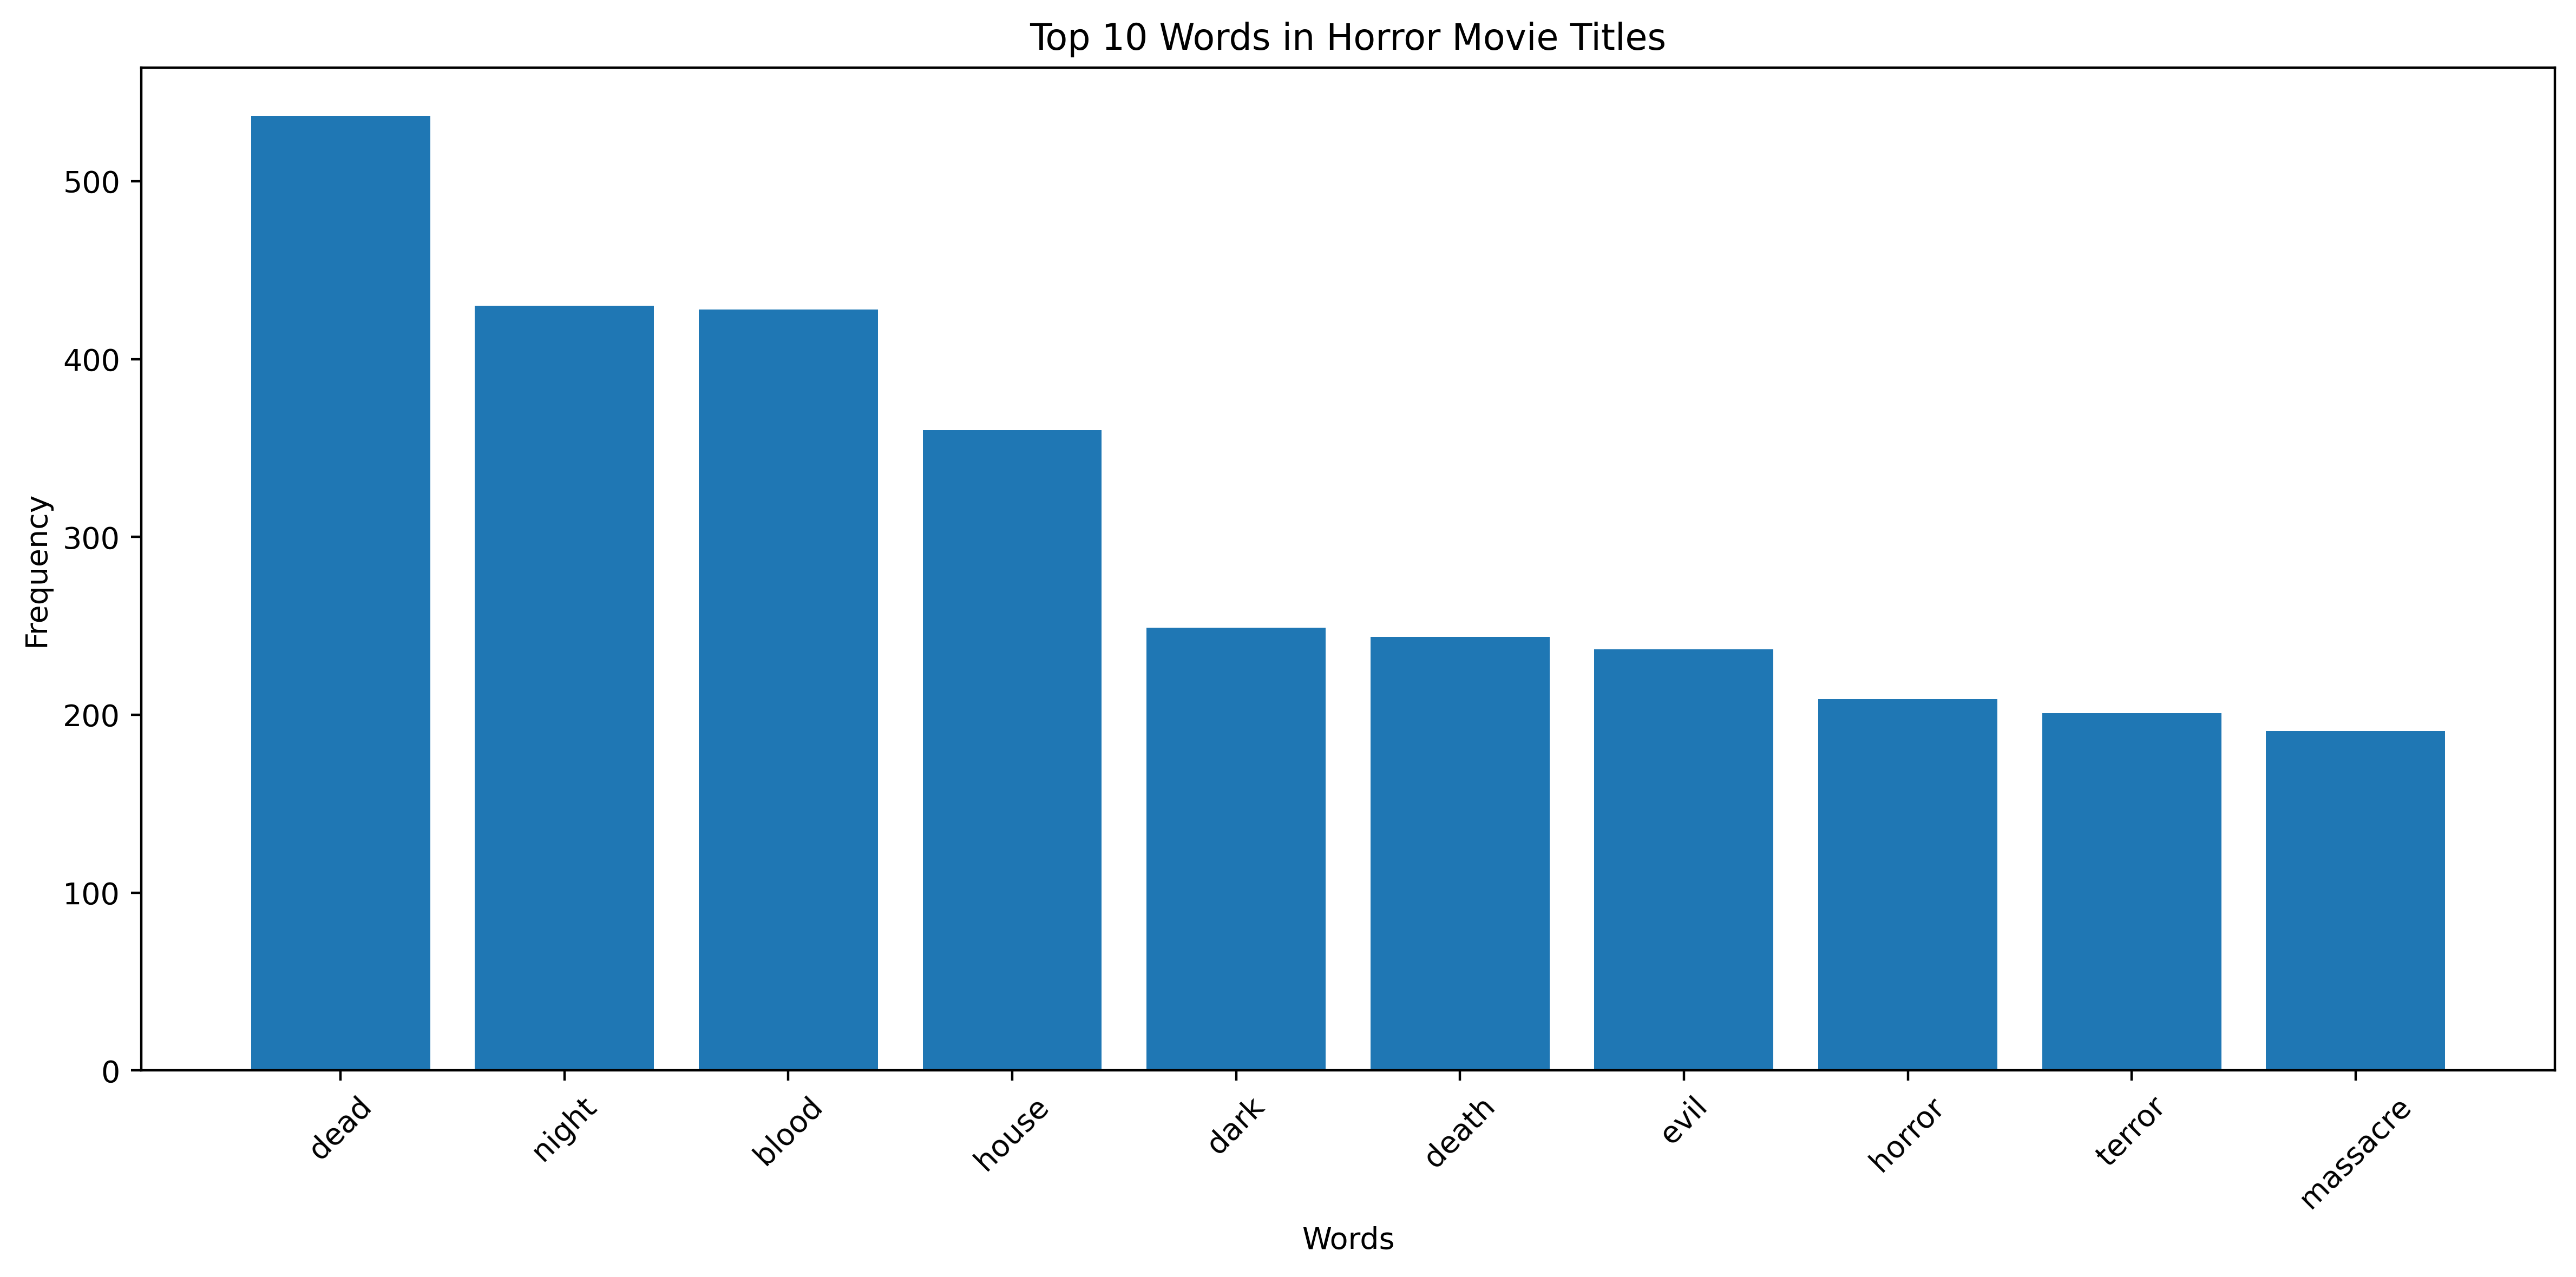

In [22]:
# Visualizing results for a specific genre (e.g., 'Horror')
def plot_top_words(genre):
    
    words, counts = zip(*genre_top_words[genre])
    
    plt.figure(figsize=(12, 6), dpi=400)
    
    plt.bar(words, counts)
    
    plt.title(f'Top 10 Words in {genre} Movie Titles')
    
    plt.xlabel('Words')
    
    plt.ylabel('Frequency')
    
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    plt.show()

plot_top_words('Horror') # Genre name



Top 20 words across all genres:
love: 4558
night: 2881
story: 2709
last: 2312
life: 2254
movie: 2205
girl: 2127
dead: 2061
black: 1899
house: 1758
american: 1645
death: 1645
blood: 1579
dark: 1562
time: 1539
world: 1500
little: 1376
girls: 1311
city: 1248
lost: 1172


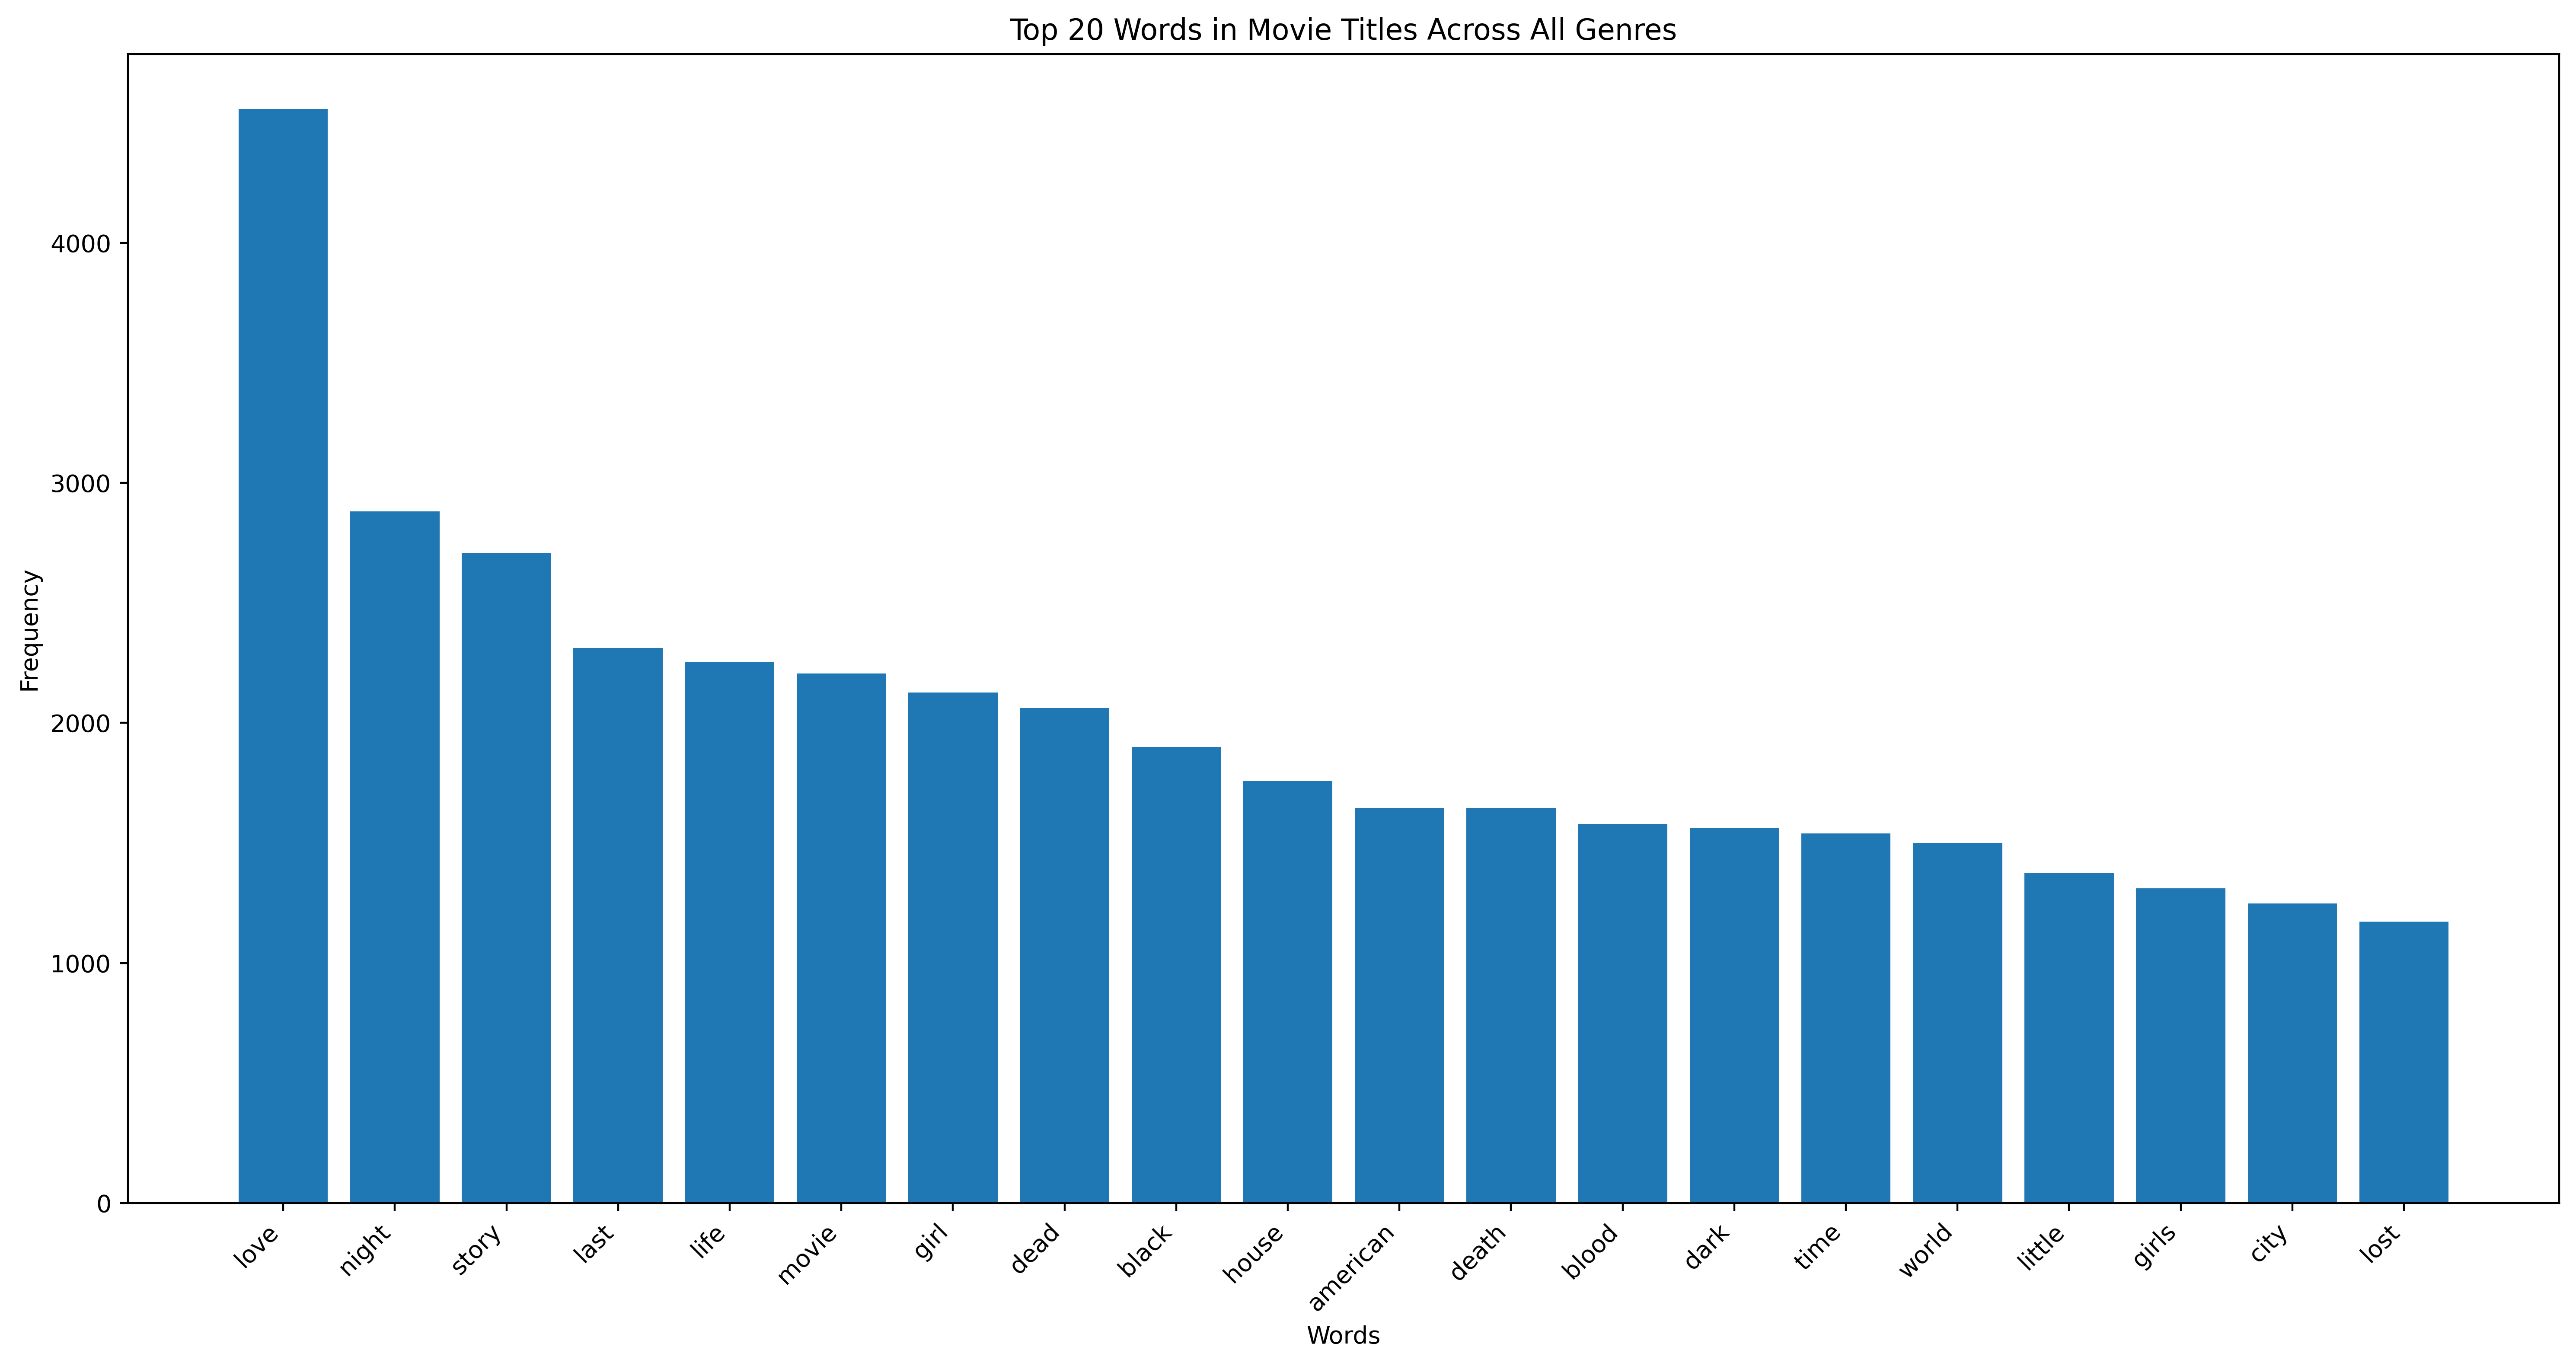

In [23]:

def get_top_words_all_genres(df, genres, n=10, min_word_length=4):
   
    english_stop_words = set(stopwords.words('english'))

    custom_stop_words = {'del', 'il', 'un', 'die', 'la', 'el', 'en', 'le', 'der', 'das', 'les'}

    # Combining the two sets and convert to a list
    all_stop_words = list(english_stop_words.union(custom_stop_words))
    
    vectorizer = CountVectorizer(stop_words=all_stop_words, token_pattern=r'\b[a-zA-Z]{%d,}\b' % min_word_length)
  
    genre_word_freq = {}   # Dictionary to store word frequencies for each genre

    # Iterating through each genre
    for genre in genres:
        
        # Getting titles for the current genre
        genre_titles = df[df[genre] == 1]['cleanedTitle']

        if len(genre_titles) == 0: # If there are no titles for this genre, skip it
            
            continue

        # Fitting and transforming the titles
        X = vectorizer.fit_transform(genre_titles)
        
        # Getting words and their counts
        words = vectorizer.get_feature_names_out()
        
        counts = X.sum(axis=0).A1
        
        word_freq = dict(zip(words, counts)) # A dictionary of word frequencies for this genre
        
        # Storing in the main dictionary
        genre_word_freq[genre] = word_freq

    # Combining word frequencies across all genres
    all_word_freq = Counter()
    
    for genre_freq in genre_word_freq.values():
        
        all_word_freq.update(genre_freq)

    # Getting the top n words
    top_words = all_word_freq.most_common(n)

    return top_words


genres = ['Action', 'Adult', 'Adventure', 'Animation', 'Comedy', 'Crime', 
          
          'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 
          
          'History', 'Horror', 'Music', 'Musical', 'Mystery', 
          
          'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

top_words = get_top_words_all_genres(df, genres, n=20)

print("Top 20 words across all genres:")

for word, count in top_words:
    
    print(f"{word}: {count}")

# Vizualizing
import matplotlib.pyplot as plt

words, counts = zip(*top_words)

plt.figure(figsize=(15, 8), dpi=400)

plt.bar(words, counts)

plt.title('Top 20 Words in Movie Titles Across All Genres')

plt.xlabel('Words')

plt.ylabel('Frequency')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

In [24]:

def get_top_words_all_genres(df, genres, n=20, min_word_length=4):
   
    english_stop_words = set(stopwords.words('english'))

    custom_stop_words = {'del', 'il', 'un', 'die', 'la', 'el', 'en', 'le', 'der', 'das', 'les'}

    # Combining the two sets and converting to a list
    all_stop_words = list(english_stop_words.union(custom_stop_words))
    
    vectorizer = CountVectorizer(stop_words=all_stop_words, token_pattern=r'\b[a-zA-Z]{%d,}\b' % min_word_length)

    genre_word_freq = {}

    for genre in genres:
        
        genre_titles = df[df[genre] == 1]['cleanedTitle']
        
        if len(genre_titles) == 0:
            
            continue

        X = vectorizer.fit_transform(genre_titles)
        
        words = vectorizer.get_feature_names_out()
        
        counts = X.sum(axis=0).A1
        
        word_freq = dict(zip(words, counts))
        
        genre_word_freq[genre] = word_freq

    all_word_freq = Counter()
    
    for genre_freq in genre_word_freq.values():
        
        all_word_freq.update(genre_freq)

    top_words = all_word_freq.most_common(n)

    return top_words

genres = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
          
          'Drama', 'Family', 'Fantasy', 'Film-Noir', 
          
          'History', 'Horror', 'Music', 'Musical', 'Mystery', 
          
          'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

top_words = get_top_words_all_genres(df, genres, n=20)

print("Top 20 words across all genres:")

for word, count in top_words:
    
    print(f"{word}: {count}")

Top 20 words across all genres:
love: 4335
night: 2821
last: 2117
story: 2098
girl: 2092
movie: 2042
dead: 1992
life: 1861
black: 1728
house: 1673
blood: 1507
death: 1502
dark: 1495
time: 1403
american: 1354
little: 1336
world: 1256
girls: 1251
city: 1136
christmas: 1120


In [25]:
# Comparing word frequencies across genres
def compare_word_across_genres(word):
    
    word_freq = {genre: dict(genre_top_words[genre]).get(word, 0) for genre in genres}
    
    sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\nFrequency of '{word}' across genres:")
    
    for genre, freq in sorted_freq:
        
        if freq > 0:
            
            print(f"{genre}: {freq}")

compare_word_across_genres('night')



Frequency of 'night' across genres:
Drama: 528
Horror: 430
Comedy: 397
Thriller: 281
Crime: 236
Mystery: 180
Romance: 175
Music: 58
Adult: 50
Fantasy: 48
Musical: 43
Film-Noir: 42



Frequency of 'night' across genres:
Drama: 528
Horror: 430
Comedy: 397
Thriller: 281
Crime: 236
Mystery: 180
Romance: 175
Music: 58
Adult: 50
Fantasy: 48
Musical: 43
Film-Noir: 42


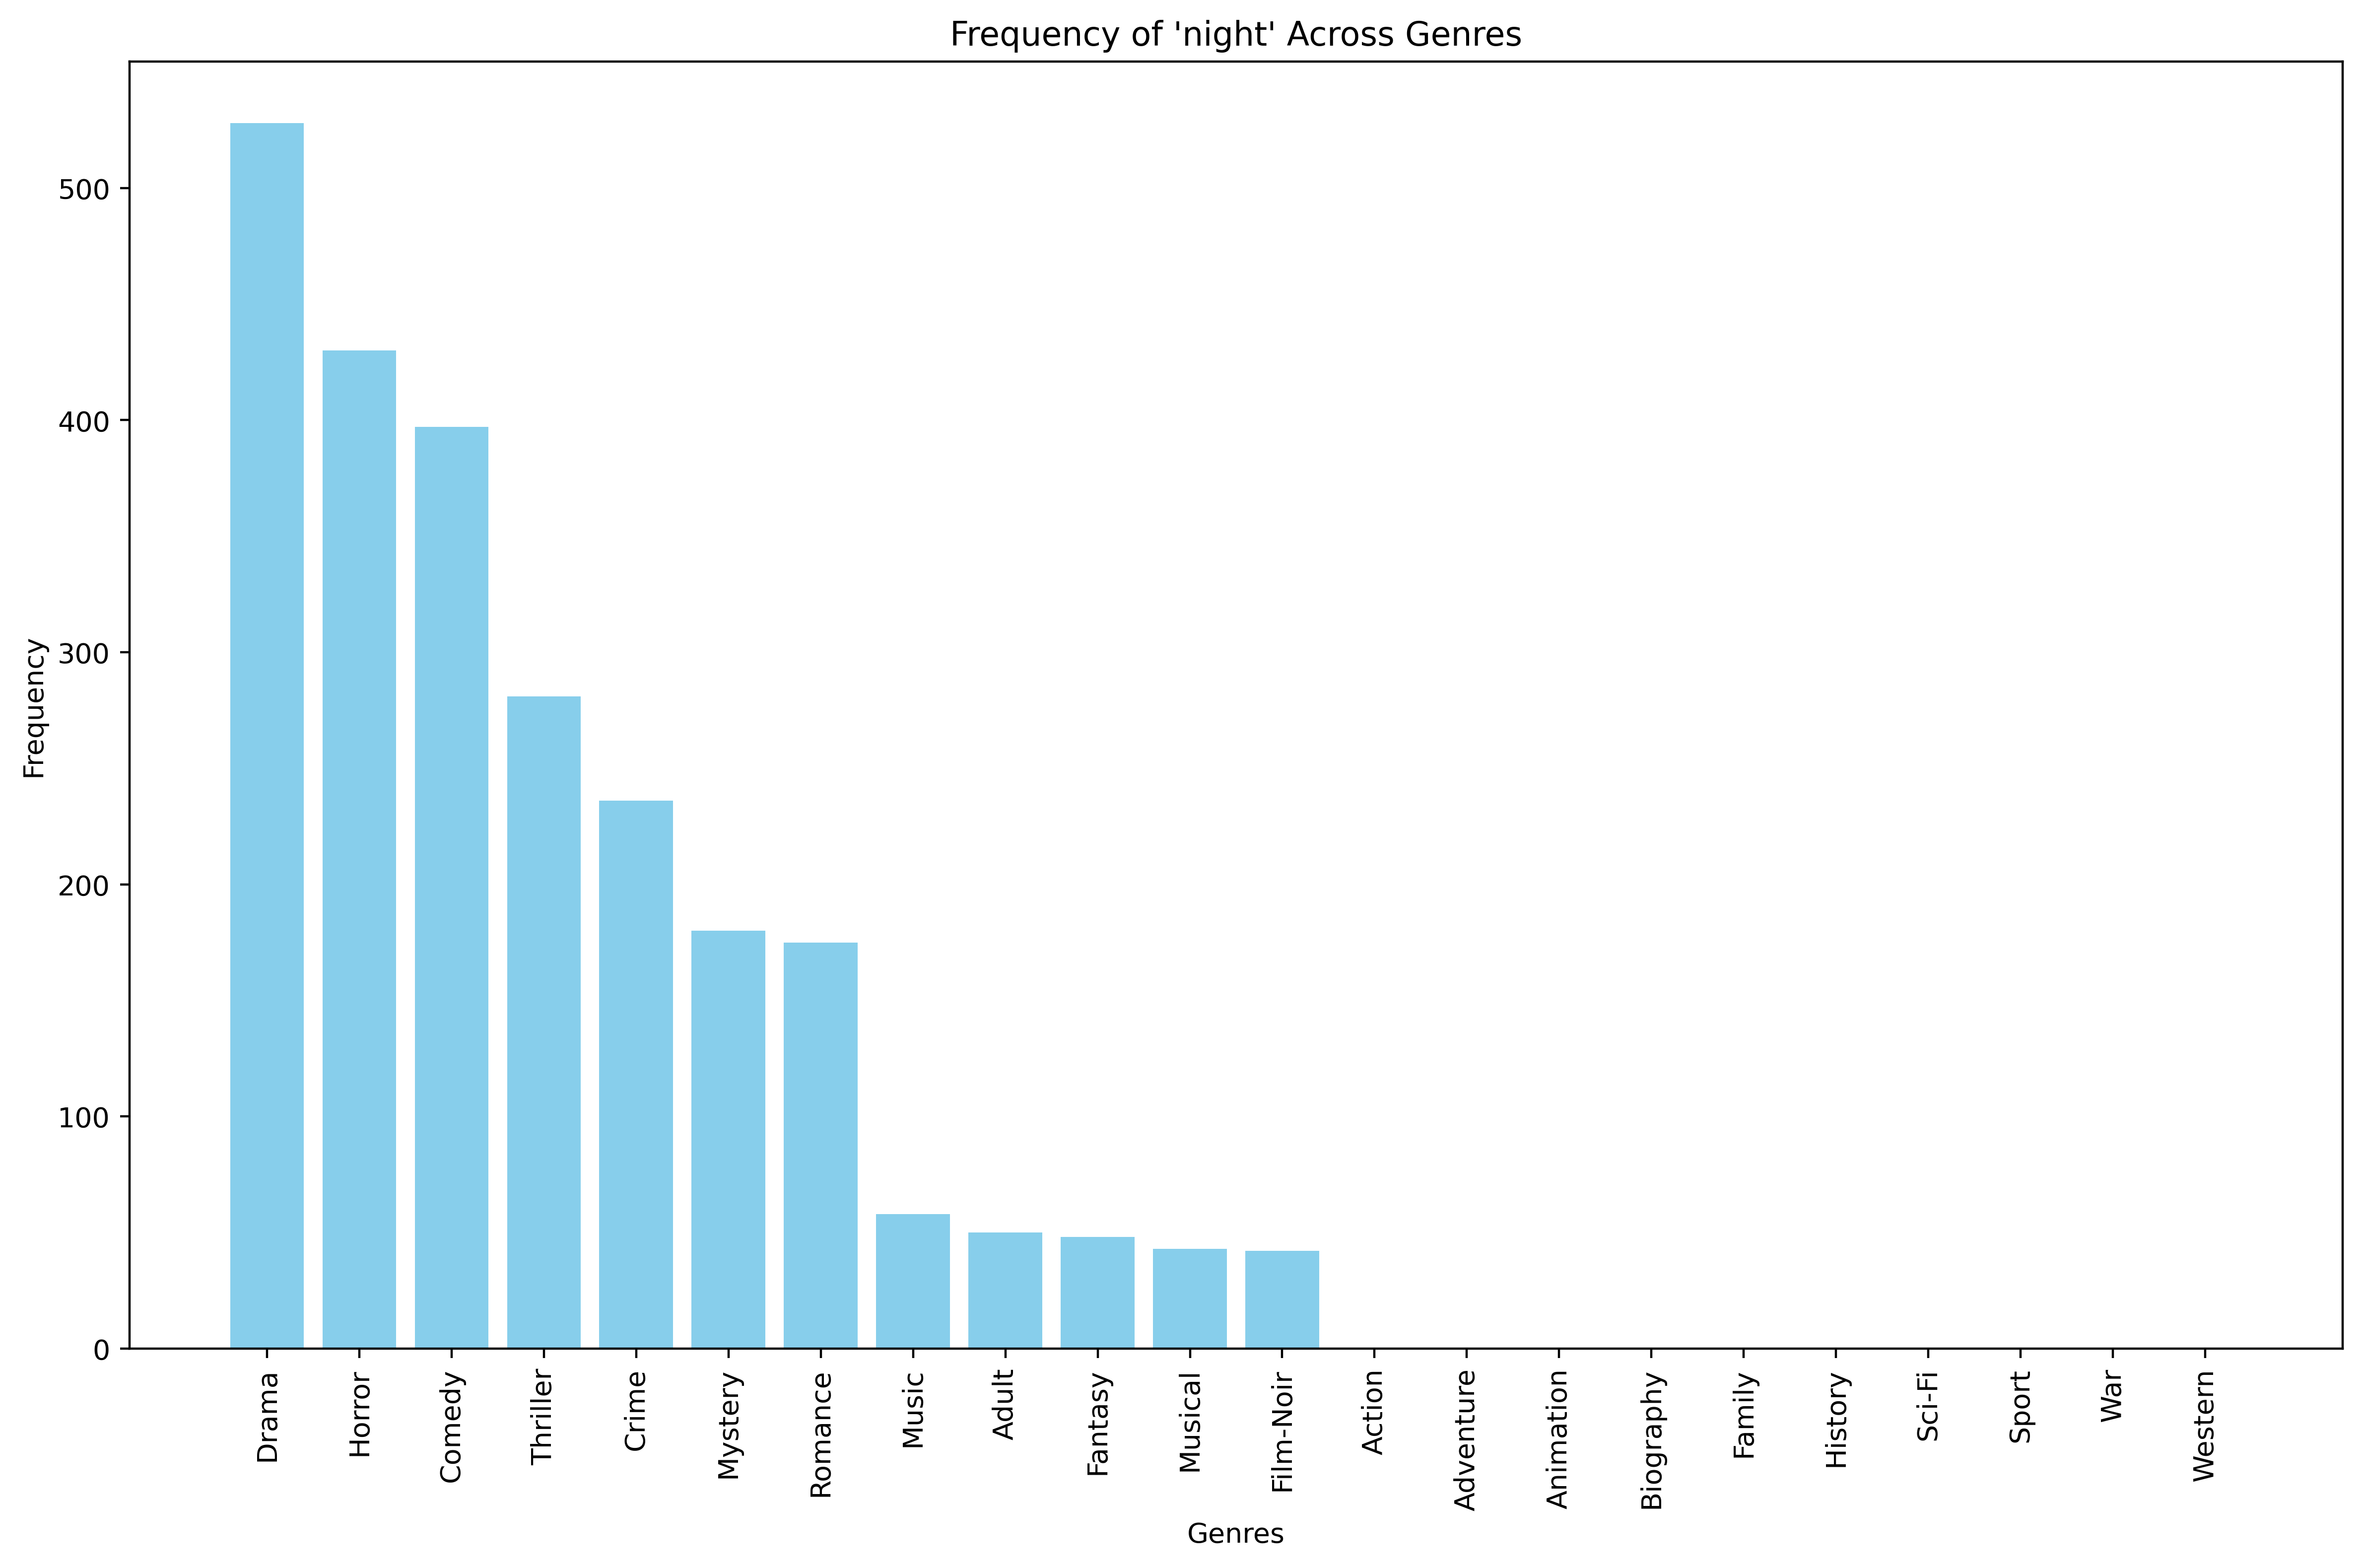

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')

# Creating a list of all genres
genres = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
          'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 
          'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# Function to get top words for a specific genre
def get_top_words(df, genre, n=10, min_word_length=4):
    genre_titles = df[df[genre] == 1]['cleanedTitle']
    
    # English stop words
    english_stop_words = set(stopwords.words('english'))

    # Custom stop words
    custom_stop_words = {'del', 'il', 'un', 'die', 'la', 'el', 'en', 'le', 'der', 'das', 'les'}

    # Combining the two sets
    all_stop_words = list(english_stop_words.union(custom_stop_words)) # converting to a list
    
    vectorizer = CountVectorizer(stop_words=all_stop_words, token_pattern=r'\b[a-zA-Z]{%d,}\b' % min_word_length)
    
    X = vectorizer.fit_transform(genre_titles)
    words = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    
    word_freq = dict(zip(words, counts))
    
    return Counter(word_freq).most_common(n)

# Analyze word frequency for each genre
genre_top_words = {genre: get_top_words(df, genre) for genre in genres}

# Extract the frequency of the word 'night' from the genre_top_words dictionary
word = 'night'
word_freq = {genre: dict(top_words).get(word, 0) for genre, top_words in genre_top_words.items()}

# Sort frequencies in descending order
sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Print frequencies
print(f"\nFrequency of '{word}' across genres:")
for genre, freq in sorted_freq:
    if freq > 0:
        print(f"{genre}: {freq}")

# Prepare data for plotting
genres_sorted = [item[0] for item in sorted_freq]
frequencies = [item[1] for item in sorted_freq]

# Create a bar chart
plt.figure(figsize=(12, 8), dpi=400)
plt.bar(genres_sorted, frequencies, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title(f"Frequency of '{word}' Across Genres")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Average title length by genre:
           AverageLength
Animation      23.978403
Music          19.690797
Biography      19.599596
History        19.596053
Adventure      19.169728
Family         18.421242
Fantasy        18.188173
Western        17.513318
Adult          17.206797
Comedy         17.166441
Musical        17.012861
Action         16.767246
War            16.718161
Sport          16.615506
Sci-Fi         16.296573
Horror         15.960078
Romance        15.775859
Crime          15.683631
Mystery        15.400749
Drama          15.317412
Film-Noir      15.278398
Thriller       13.882822


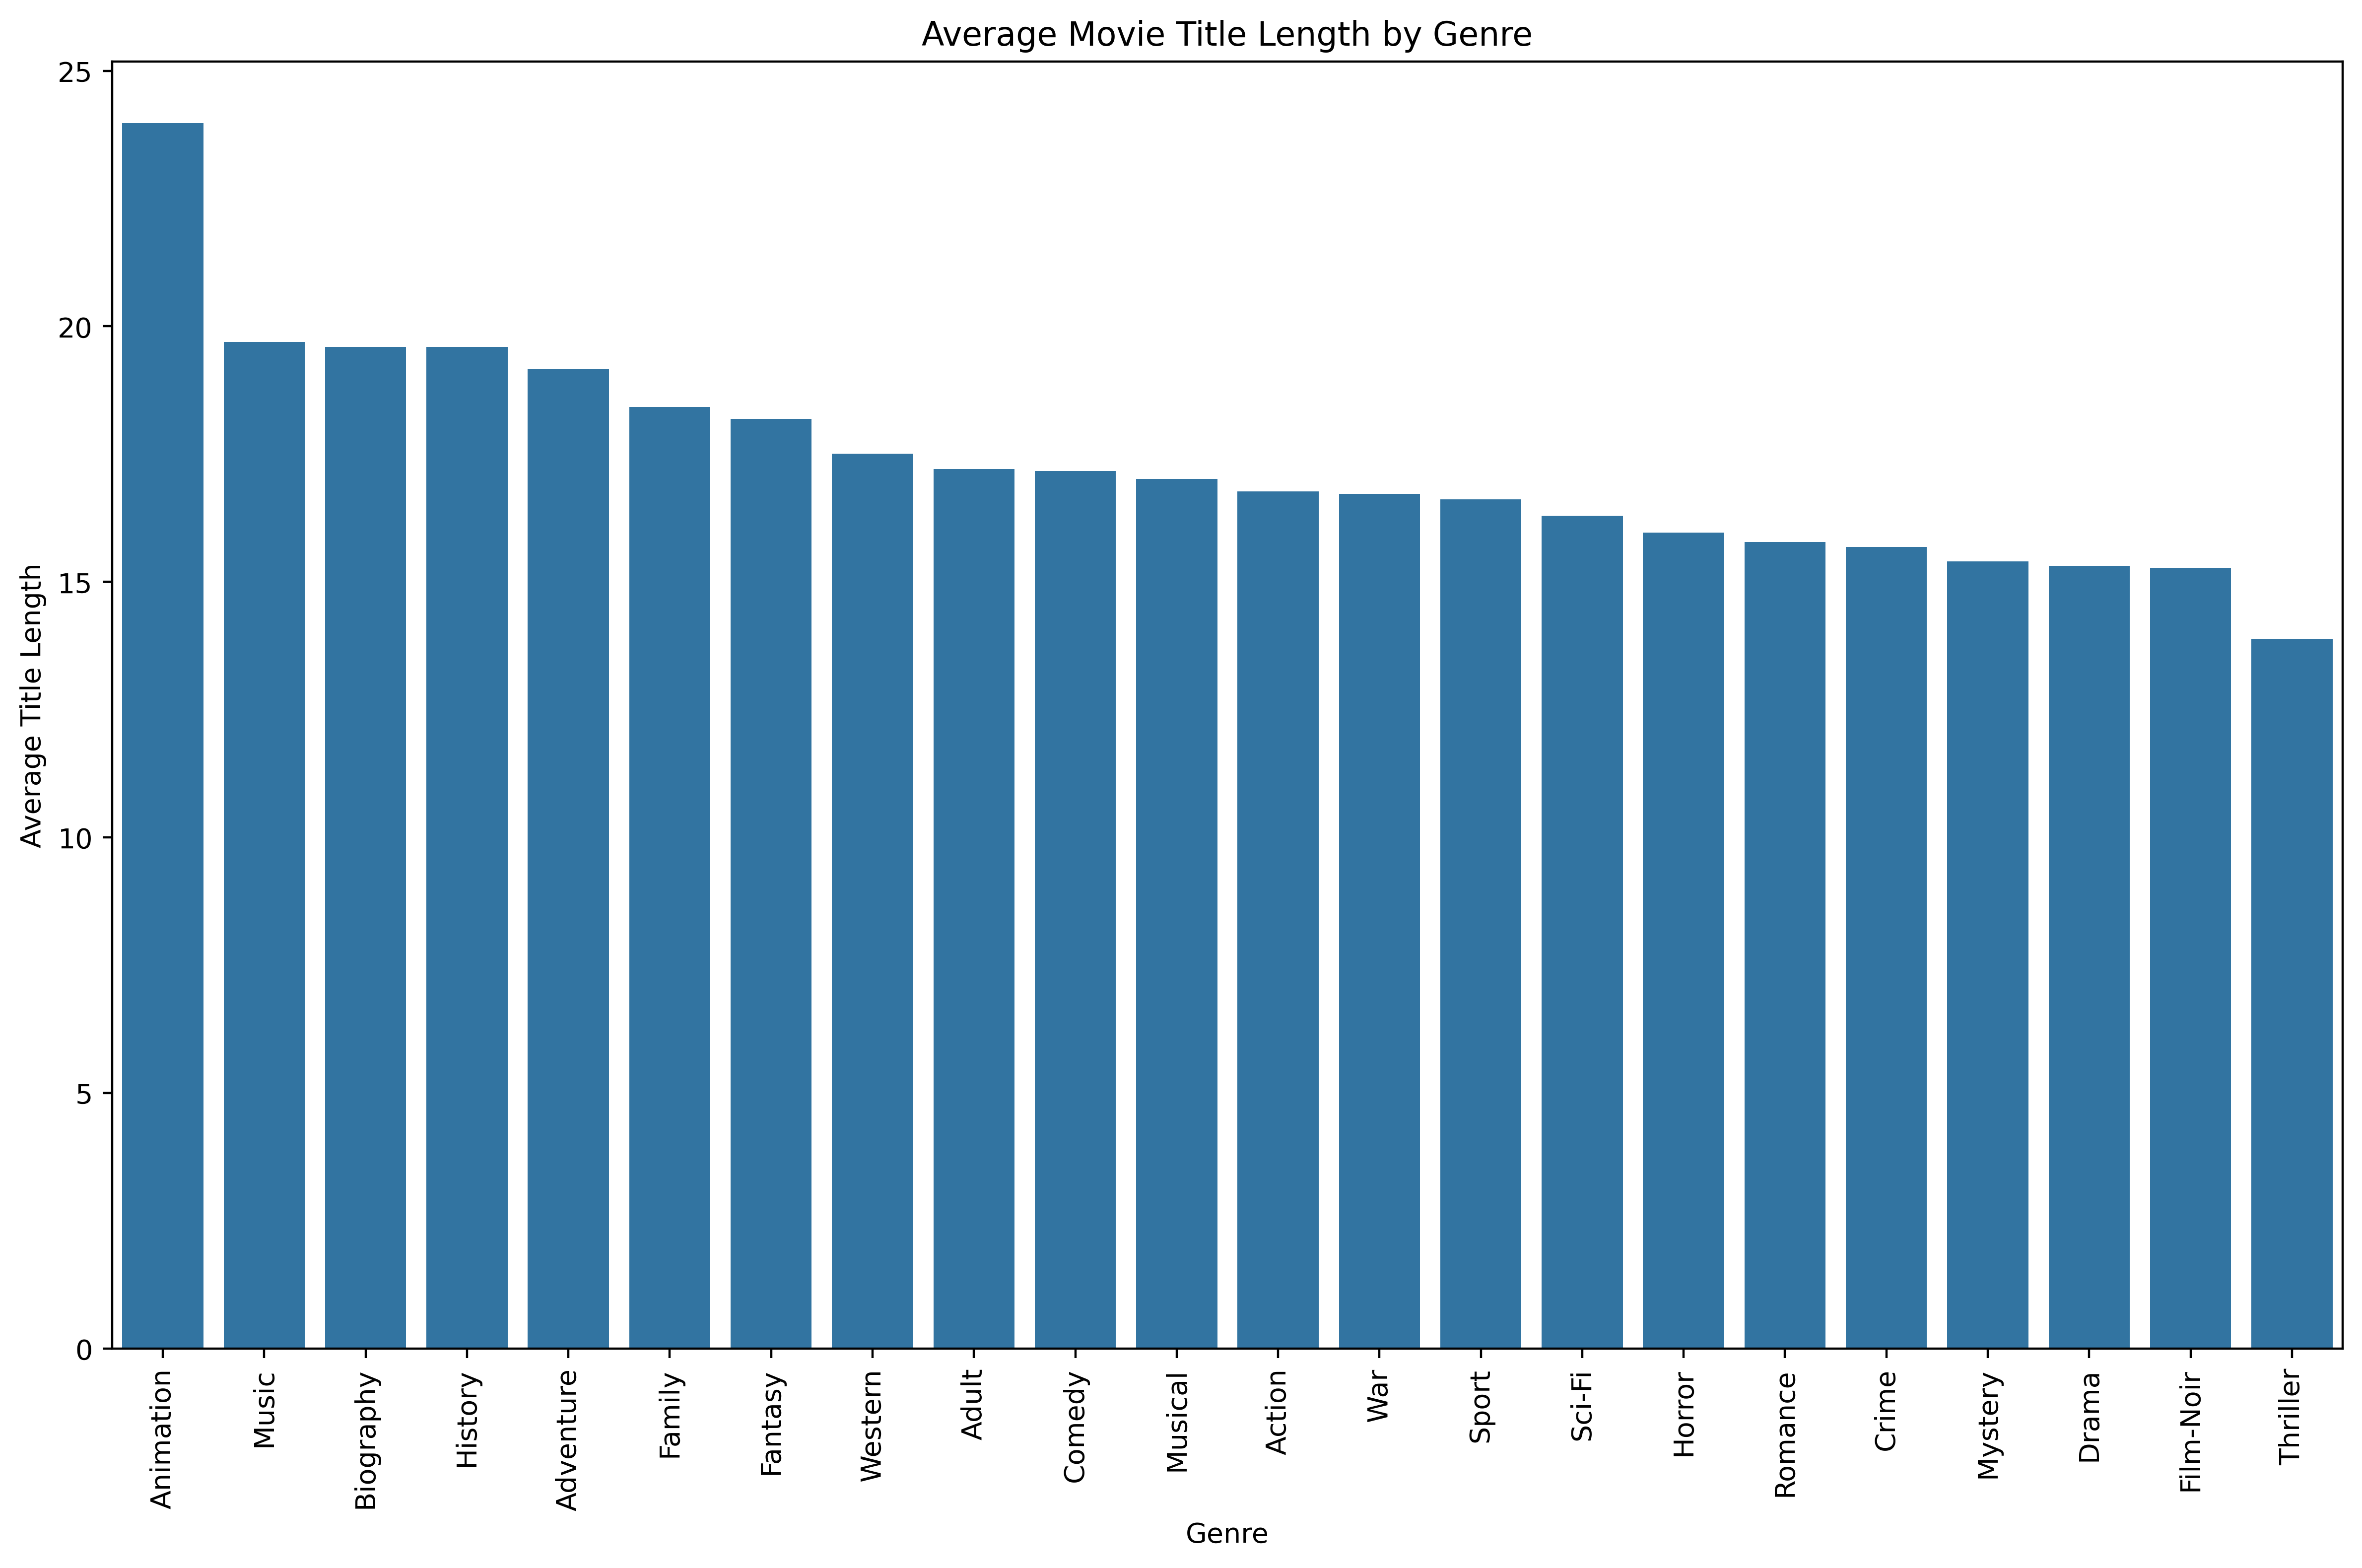

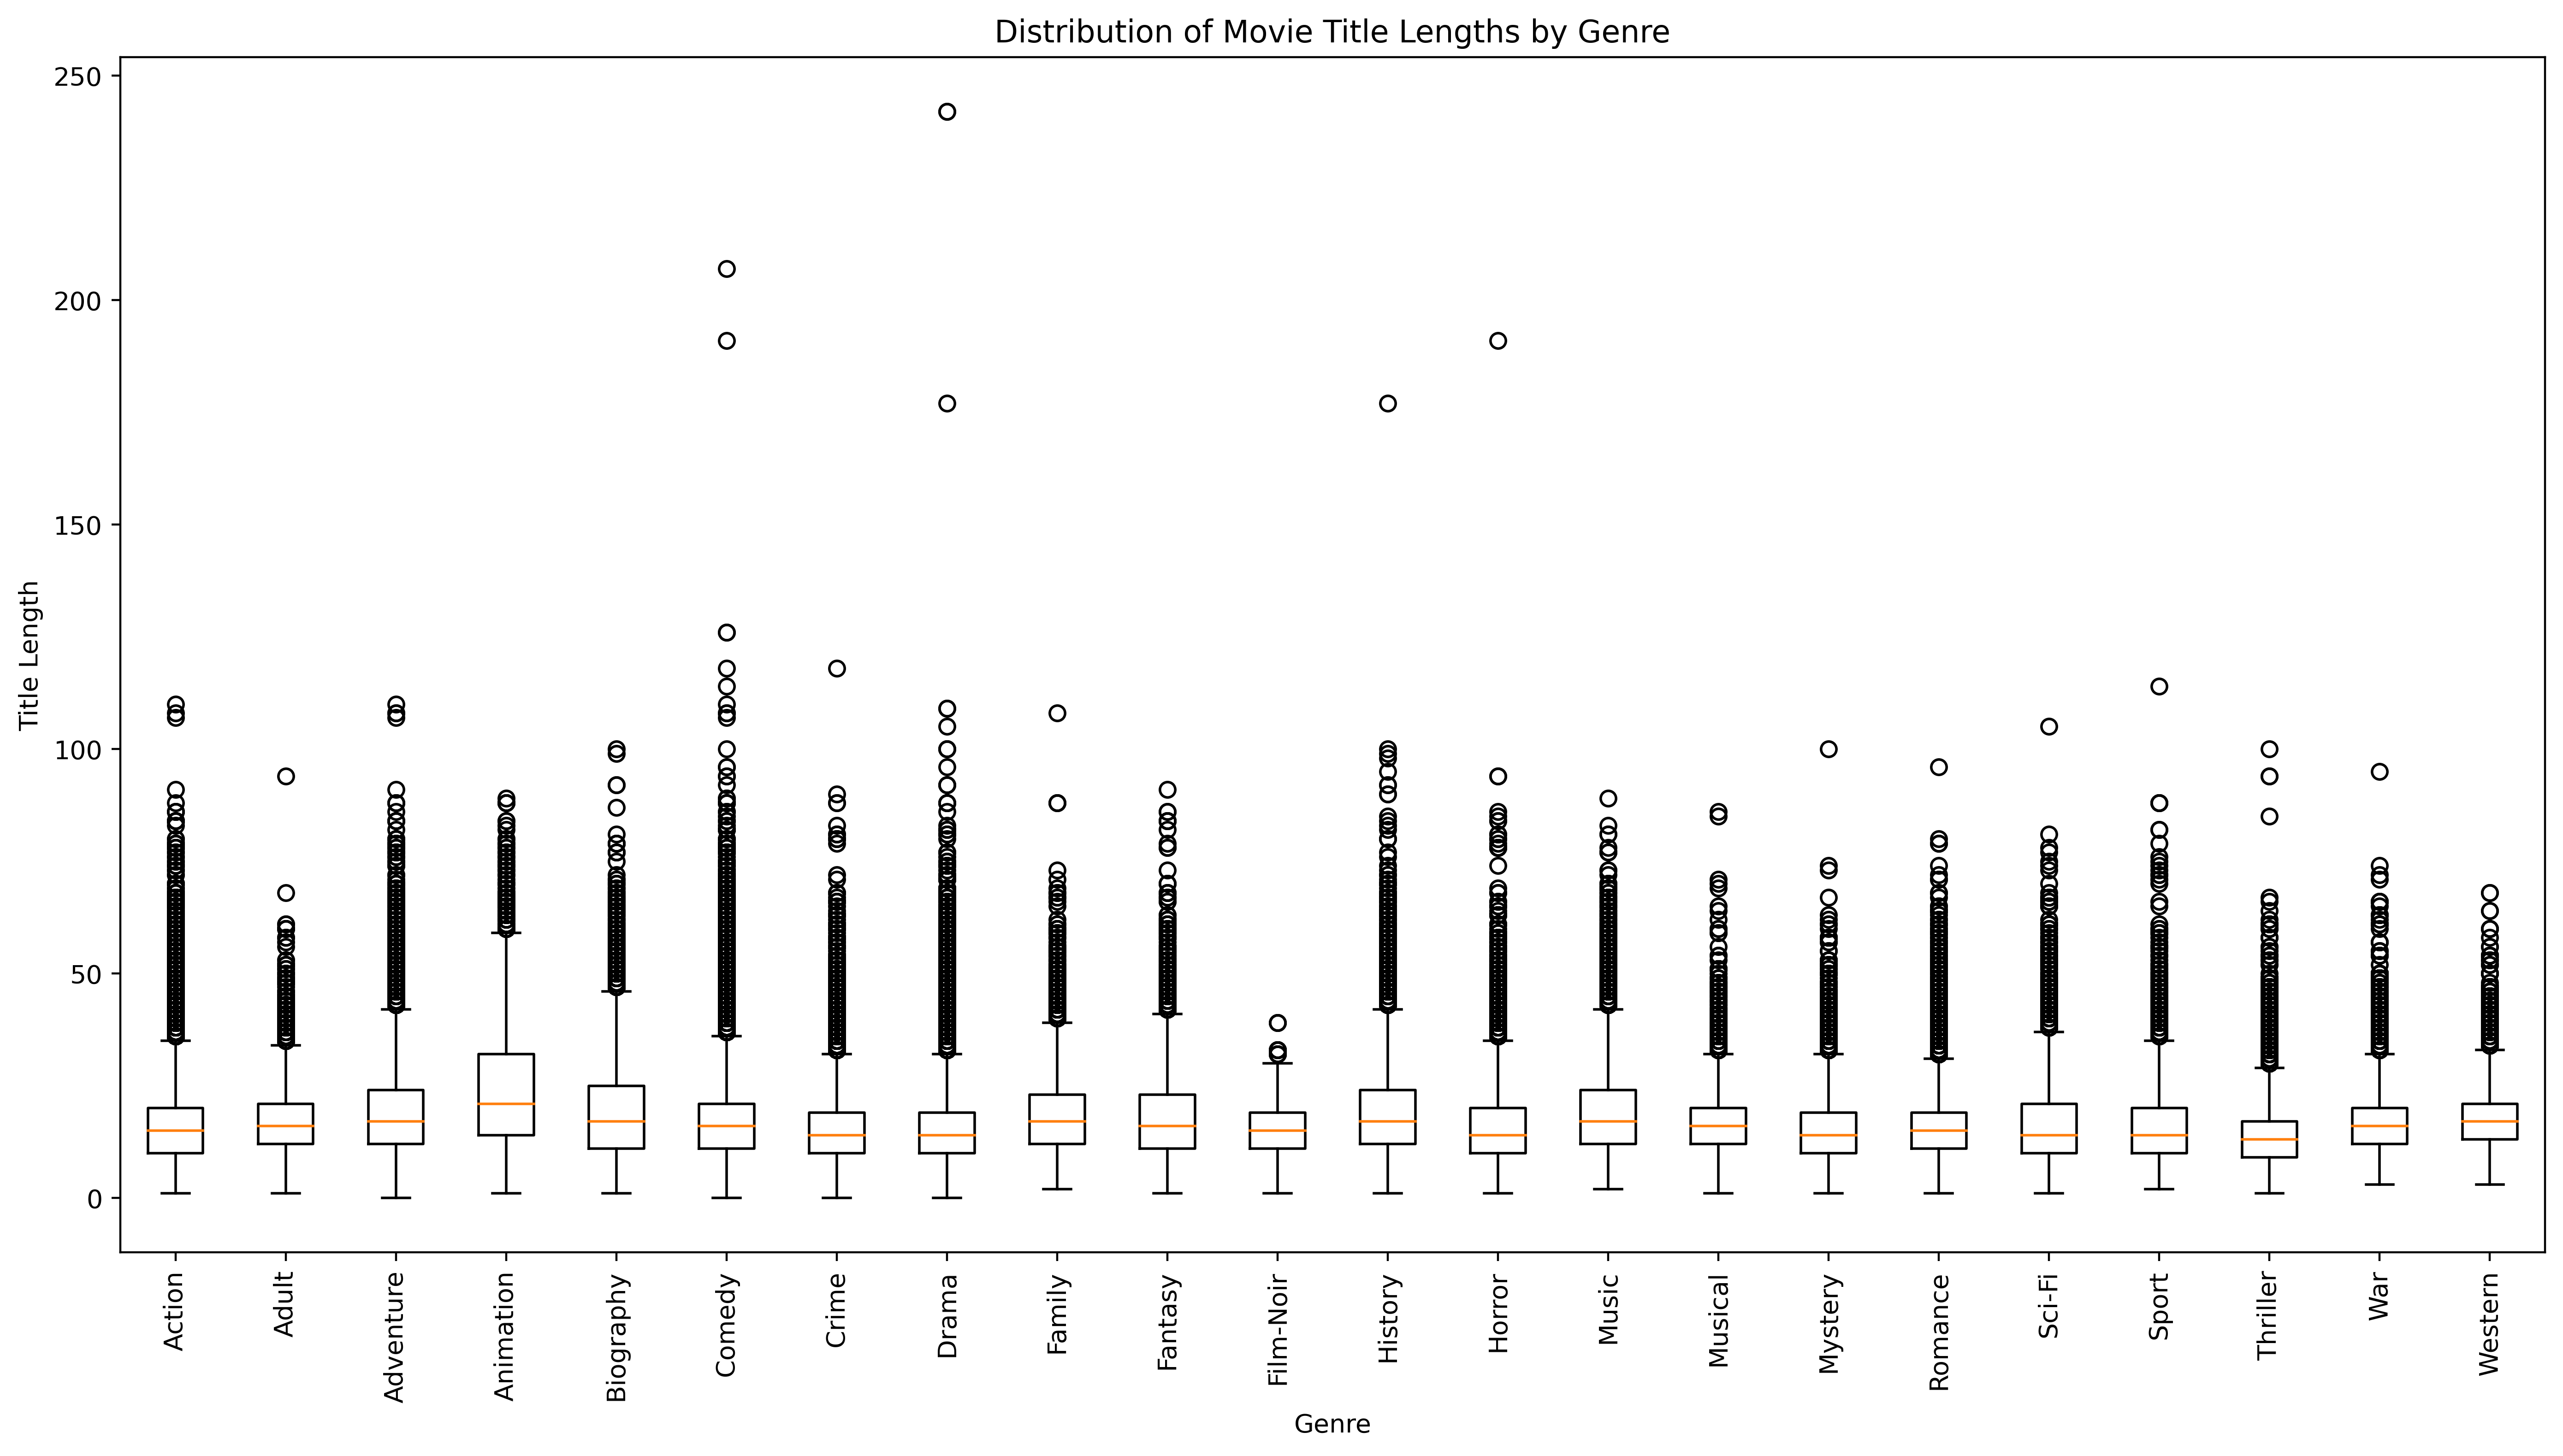


Correlation between title length and number of genres: -0.10


In [27]:
import seaborn as sns

def analyze_title_length_by_genre(df, genres):

    genre_avg_length = {} # Dictionary to store average title length for each genre

    for genre in genres:
        # Average calculation
        avg_length = df[df[genre] == 1]['titleLength'].mean()
        
        genre_avg_length[genre] = avg_length

    # Converting to DataFrame for easier manipulation
    genre_length_df = pd.DataFrame.from_dict(genre_avg_length, orient='index', columns=['AverageLength'])
    
    genre_length_df = genre_length_df.sort_values('AverageLength', ascending=False)


    print("Average title length by genre:")
    
    print(genre_length_df)

    # Plotting
    plt.figure(figsize=(12, 8), dpi=400)
    
    sns.barplot(x=genre_length_df.index, y='AverageLength', data=genre_length_df)
    
    plt.title('Average Movie Title Length by Genre')
    
    plt.xlabel('Genre')
    
    plt.ylabel('Average Title Length')
    
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    
    plt.show()
    

    # Boxplot
    plt.figure(figsize=(14, 8), dpi=400)
    
    genre_data = [df[df[genre] == 1]['titleLength'] for genre in genres]
    
    plt.boxplot(genre_data, labels=genres)
    
    plt.title('Distribution of Movie Title Lengths by Genre')
    
    plt.xlabel('Genre')
    
    plt.ylabel('Title Length')
    
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    
    plt.show()

    return genre_length_df

genres = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
          
          'Drama', 'Family', 'Fantasy', 'Film-Noir', 
          
          'History', 'Horror', 'Music', 'Musical', 'Mystery', 
          
          'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# Run the analysis
genre_length_df = analyze_title_length_by_genre(df, genres)

# Additional analysis: correlation between title length and number of genres
df['num_genres'] = df[genres].sum(axis=1)

correlation = df['titleLength'].corr(df['num_genres'])

print(f"\nCorrelation between title length and number of genres: {correlation:.2f}")



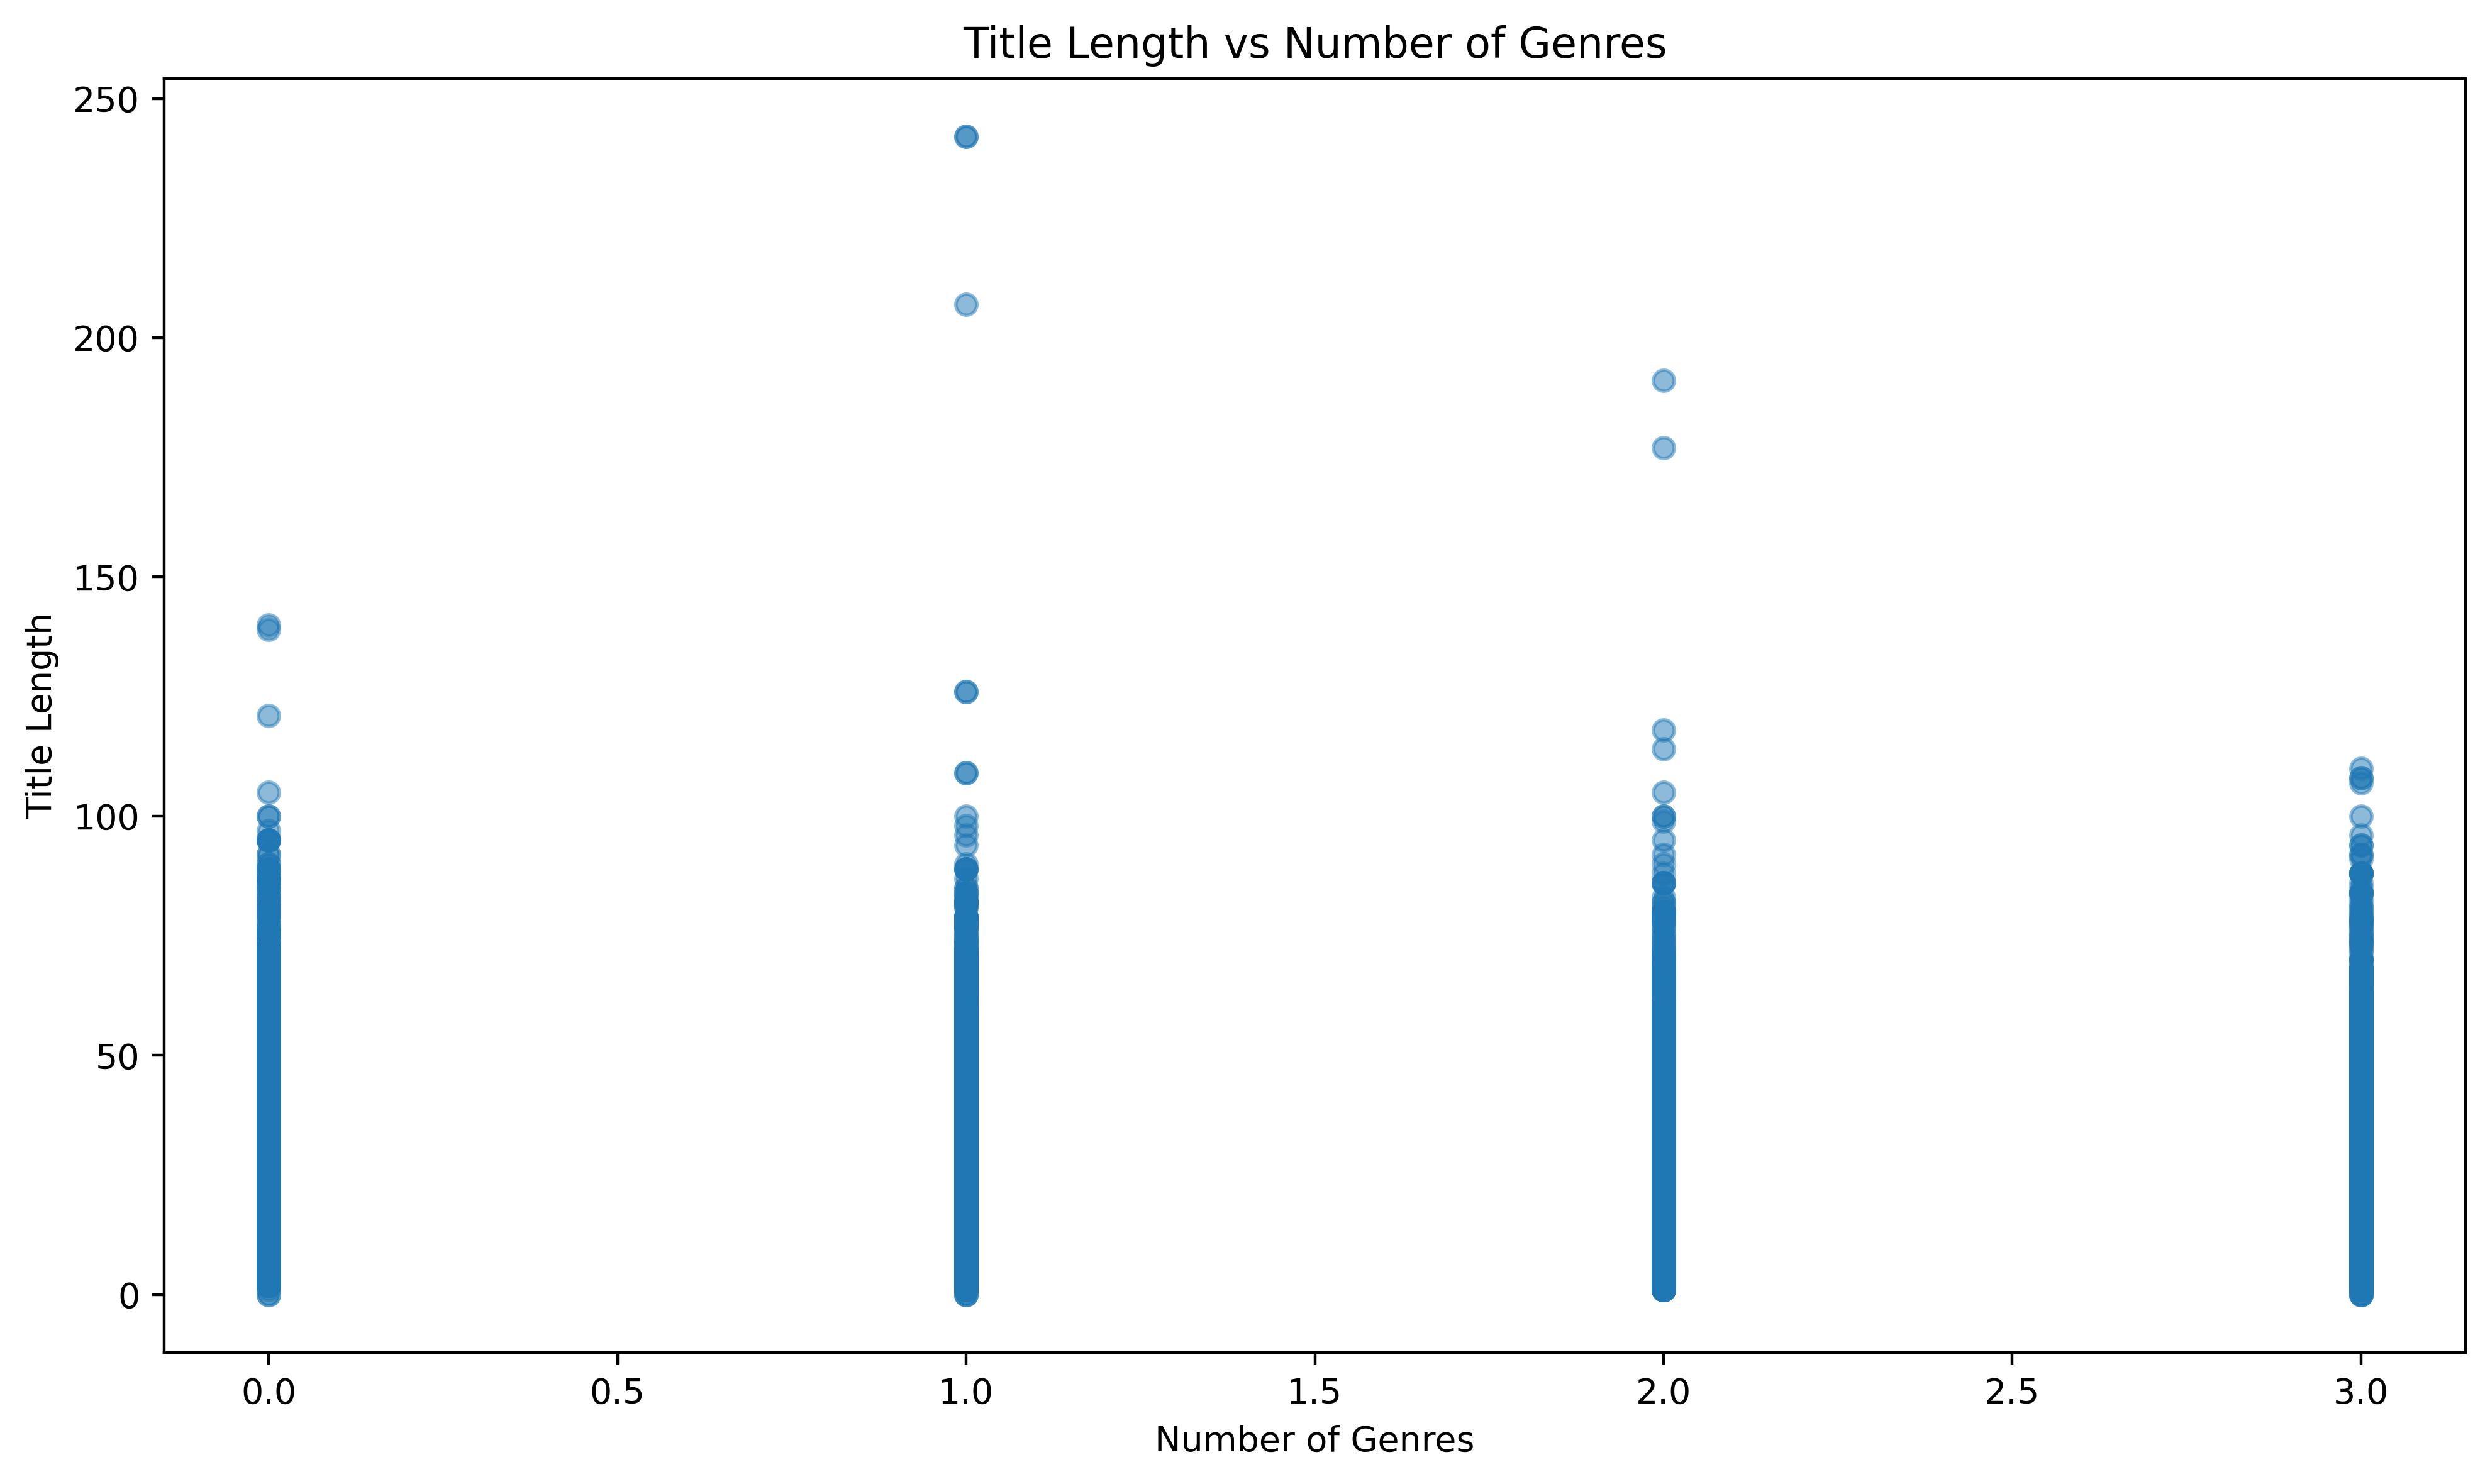

In [28]:
# Plotting title length vs number of genres
plt.figure(figsize=(10, 6), dpi=400)

plt.scatter(df['num_genres'], df['titleLength'], alpha=0.5)

plt.title('Title Length vs Number of Genres')

plt.xlabel('Number of Genres')

plt.ylabel('Title Length')

plt.tight_layout()

plt.show()

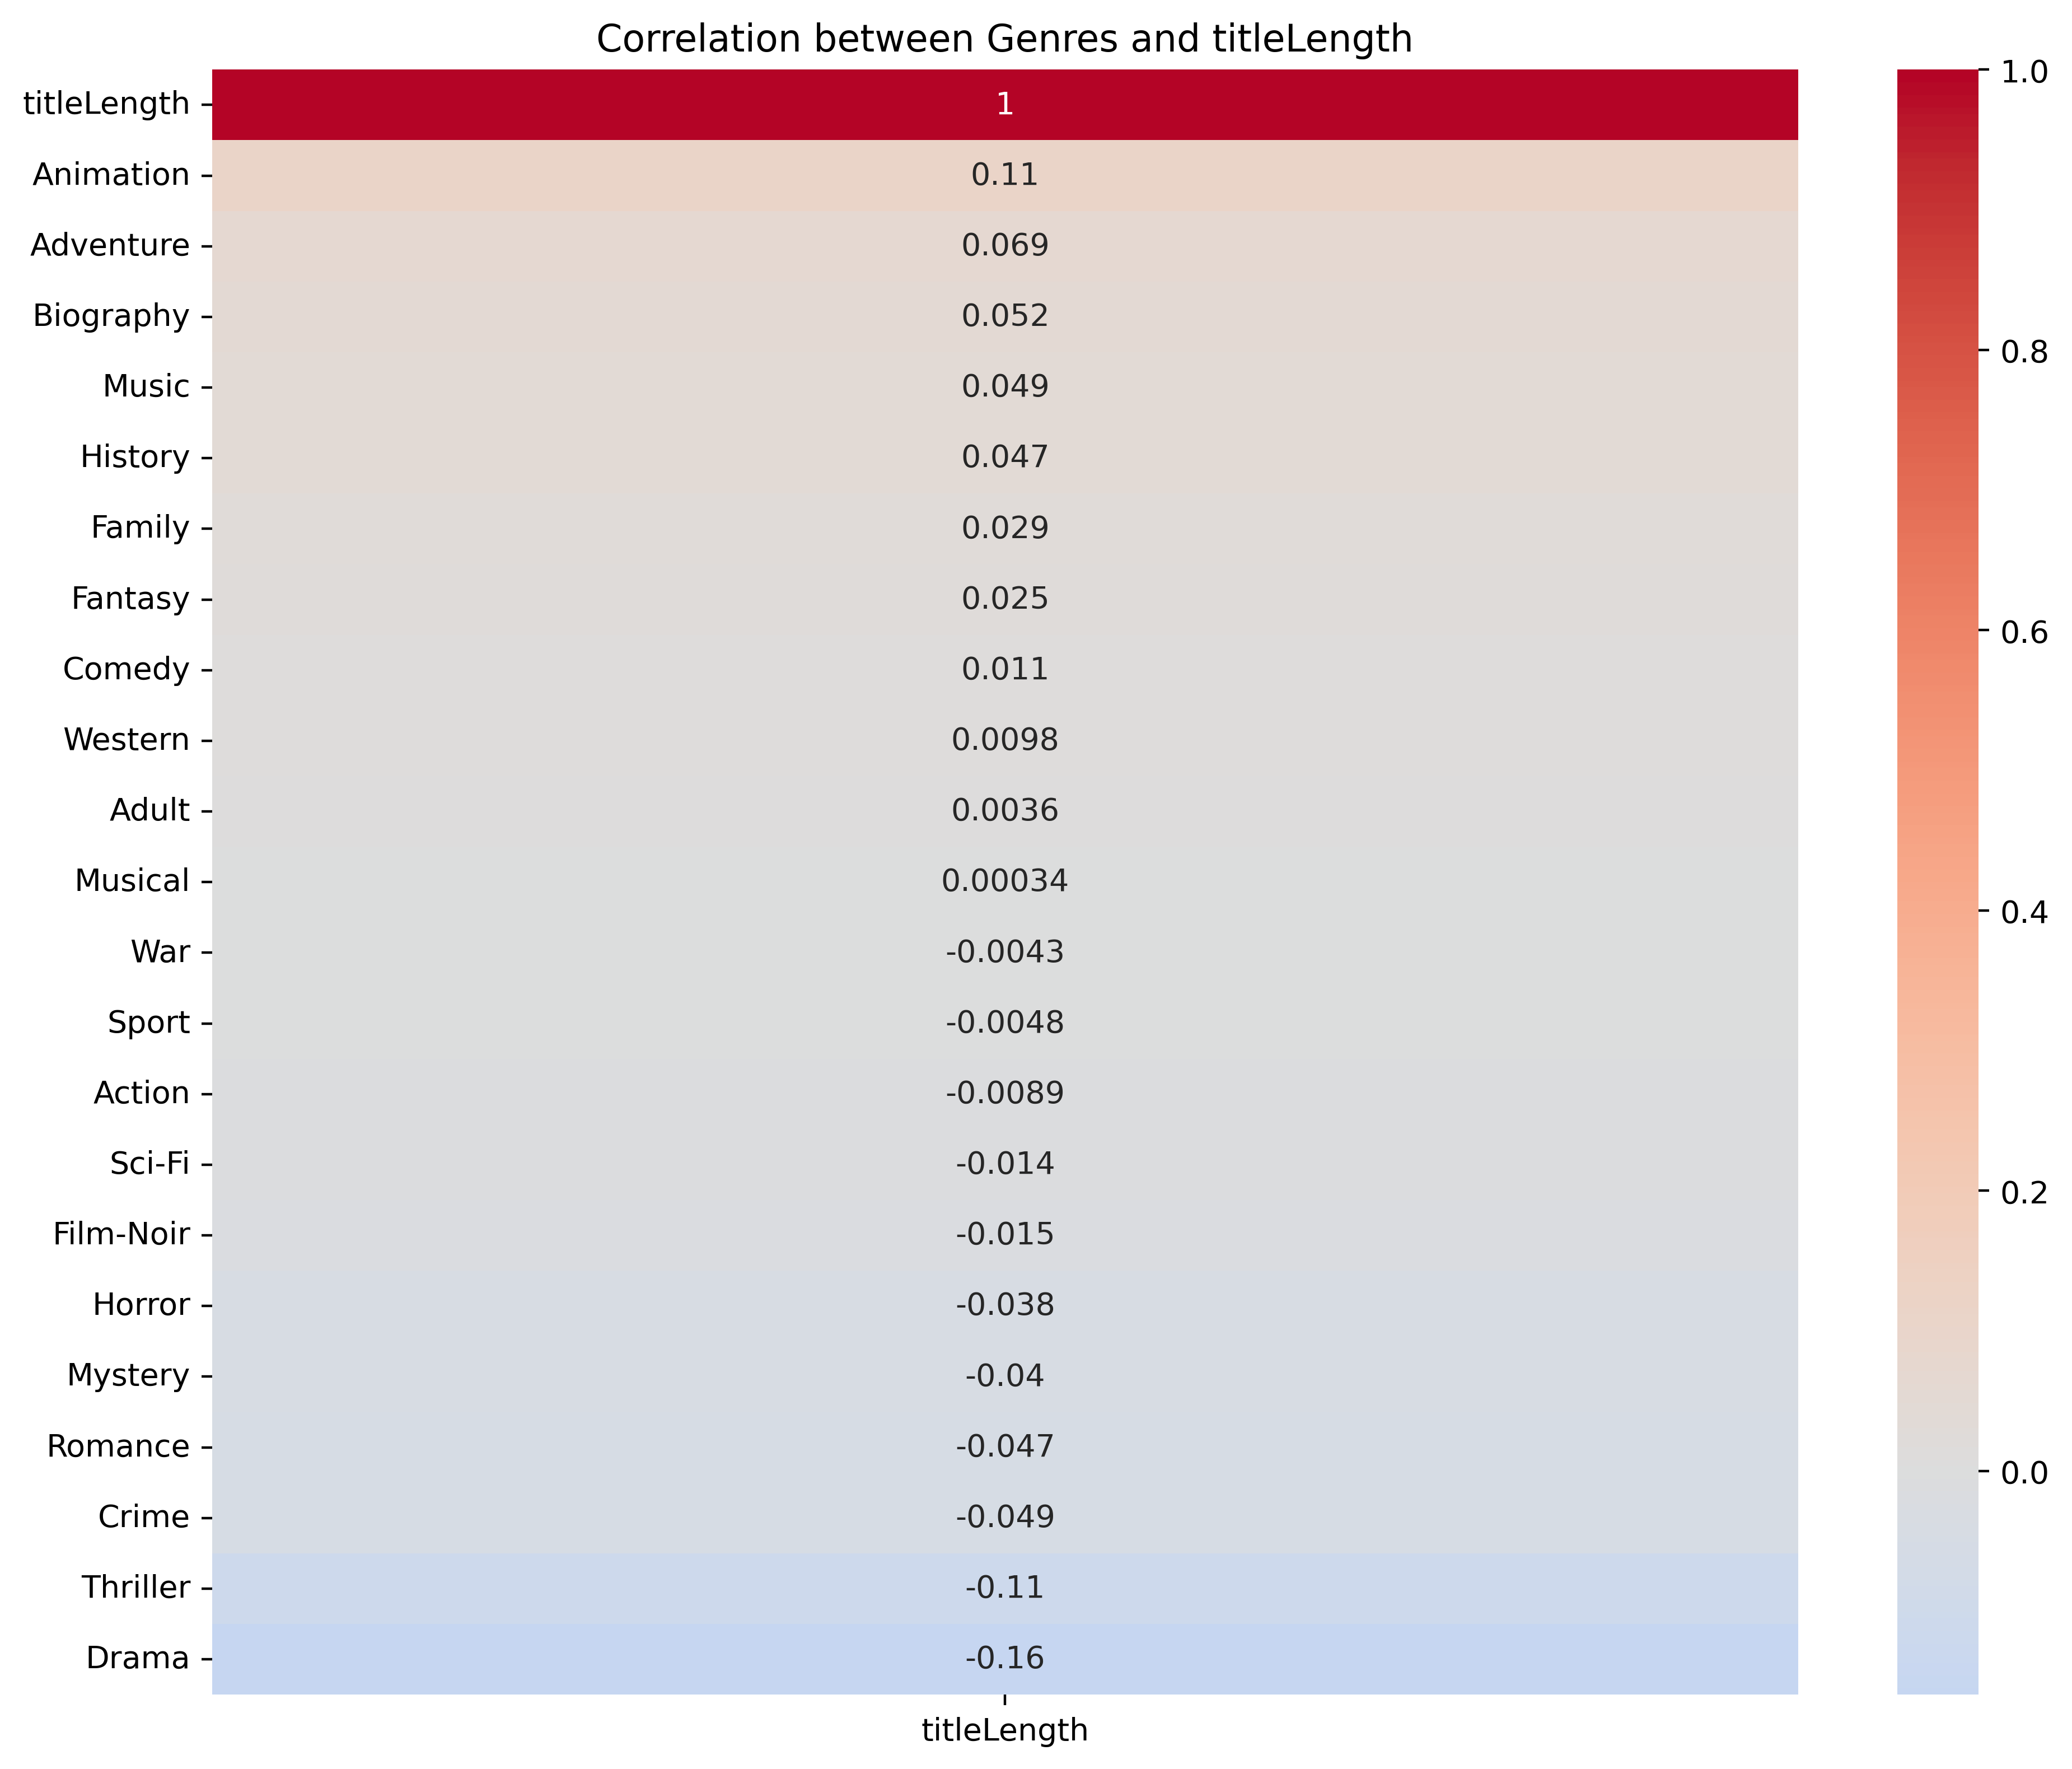

In [29]:
# Heatmap of genre correlations
genre_correlations = df[genres + ['titleLength']].corr()['titleLength'].sort_values(ascending=False)

plt.figure(figsize=(10, 8), dpi=400)

sns.heatmap(genre_correlations.to_frame(), annot=True, cmap='coolwarm', center=0)

plt.title('Correlation between Genres and titleLength')

plt.tight_layout()

plt.show()

#### Hypothesis #2:
- Runtime correlation hypothesis:
Movie runtime is indicative of genre. For example, comedies might tend to be shorter than epic dramas or sci-fi films.

Average runtime (in minutes) by genre:
           AverageRuntime
History        102.514058
Action          99.651308
Biography       99.212741
War             98.774543
Drama           96.816498
Musical         96.636046
Adventure       96.237434
Romance         96.188535
Thriller        95.869329
Crime           95.162589
Sport           95.111147
Fantasy         94.864738
Mystery         94.382321
Sci-Fi          93.483000
Family          93.044134
Comedy          92.776353
Music           92.024908
Horror          89.273538
Animation       87.154537
Film-Noir       82.623112
Western         79.667878
Adult           76.455608


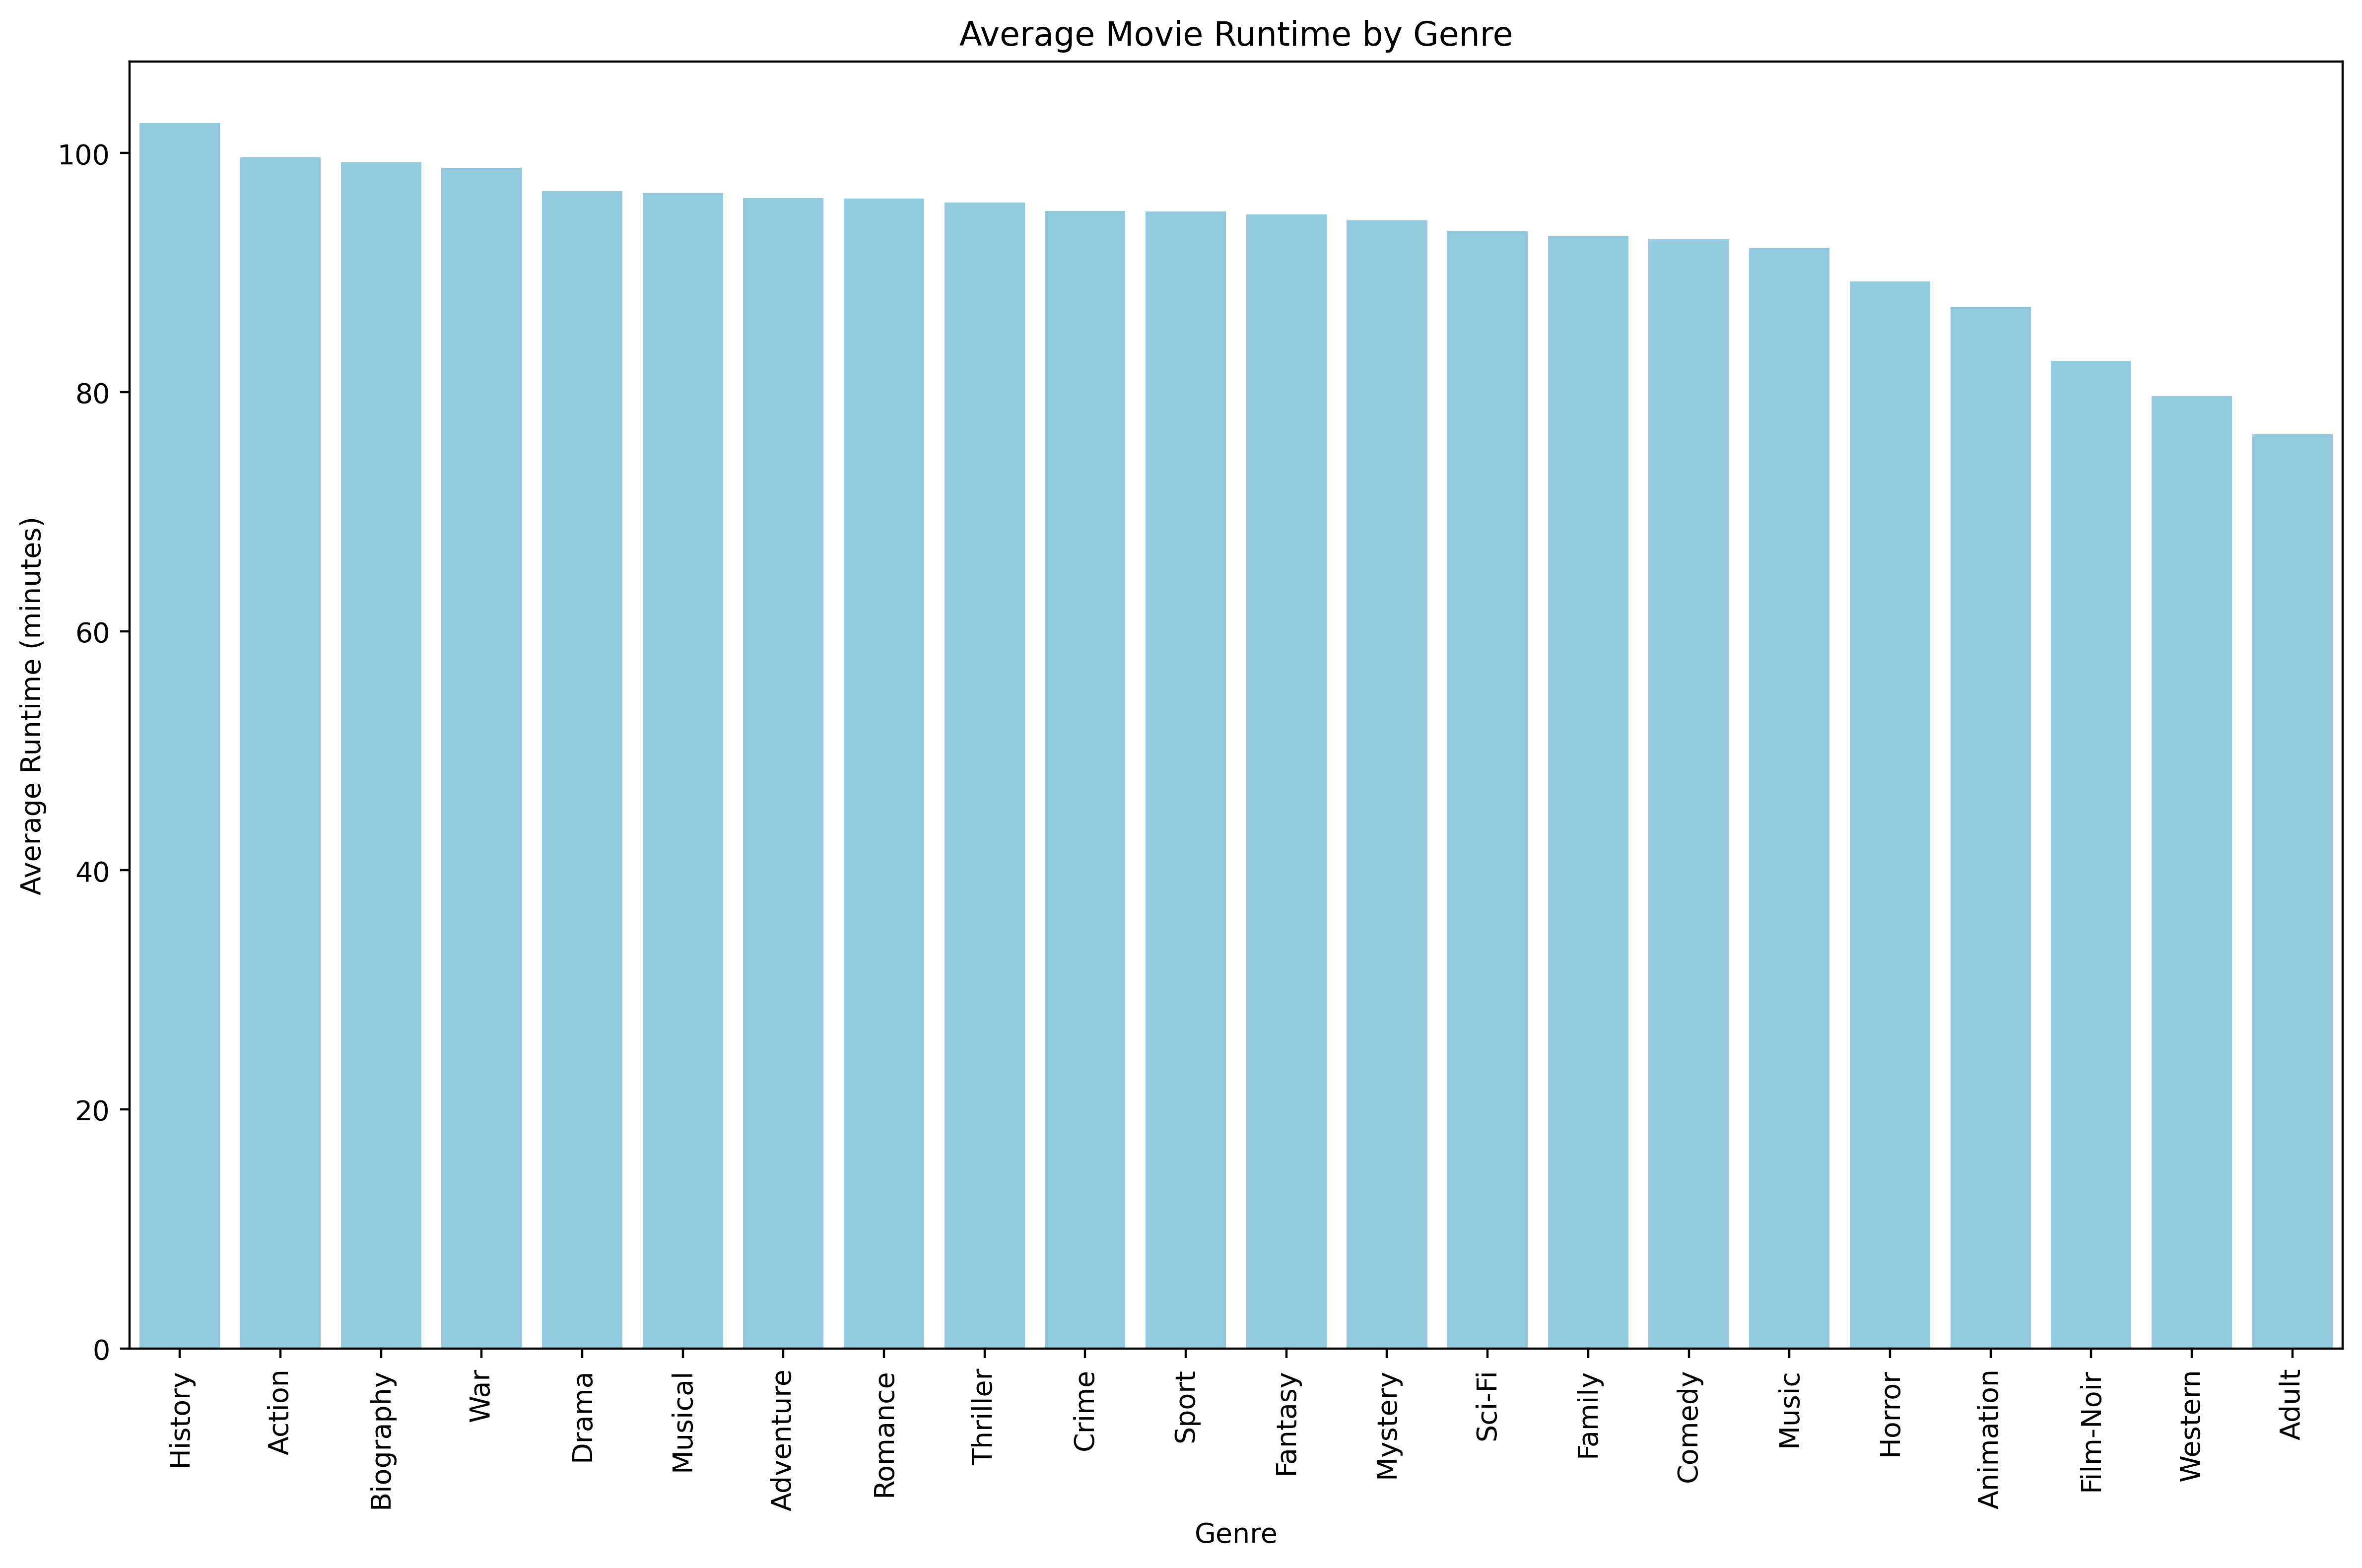

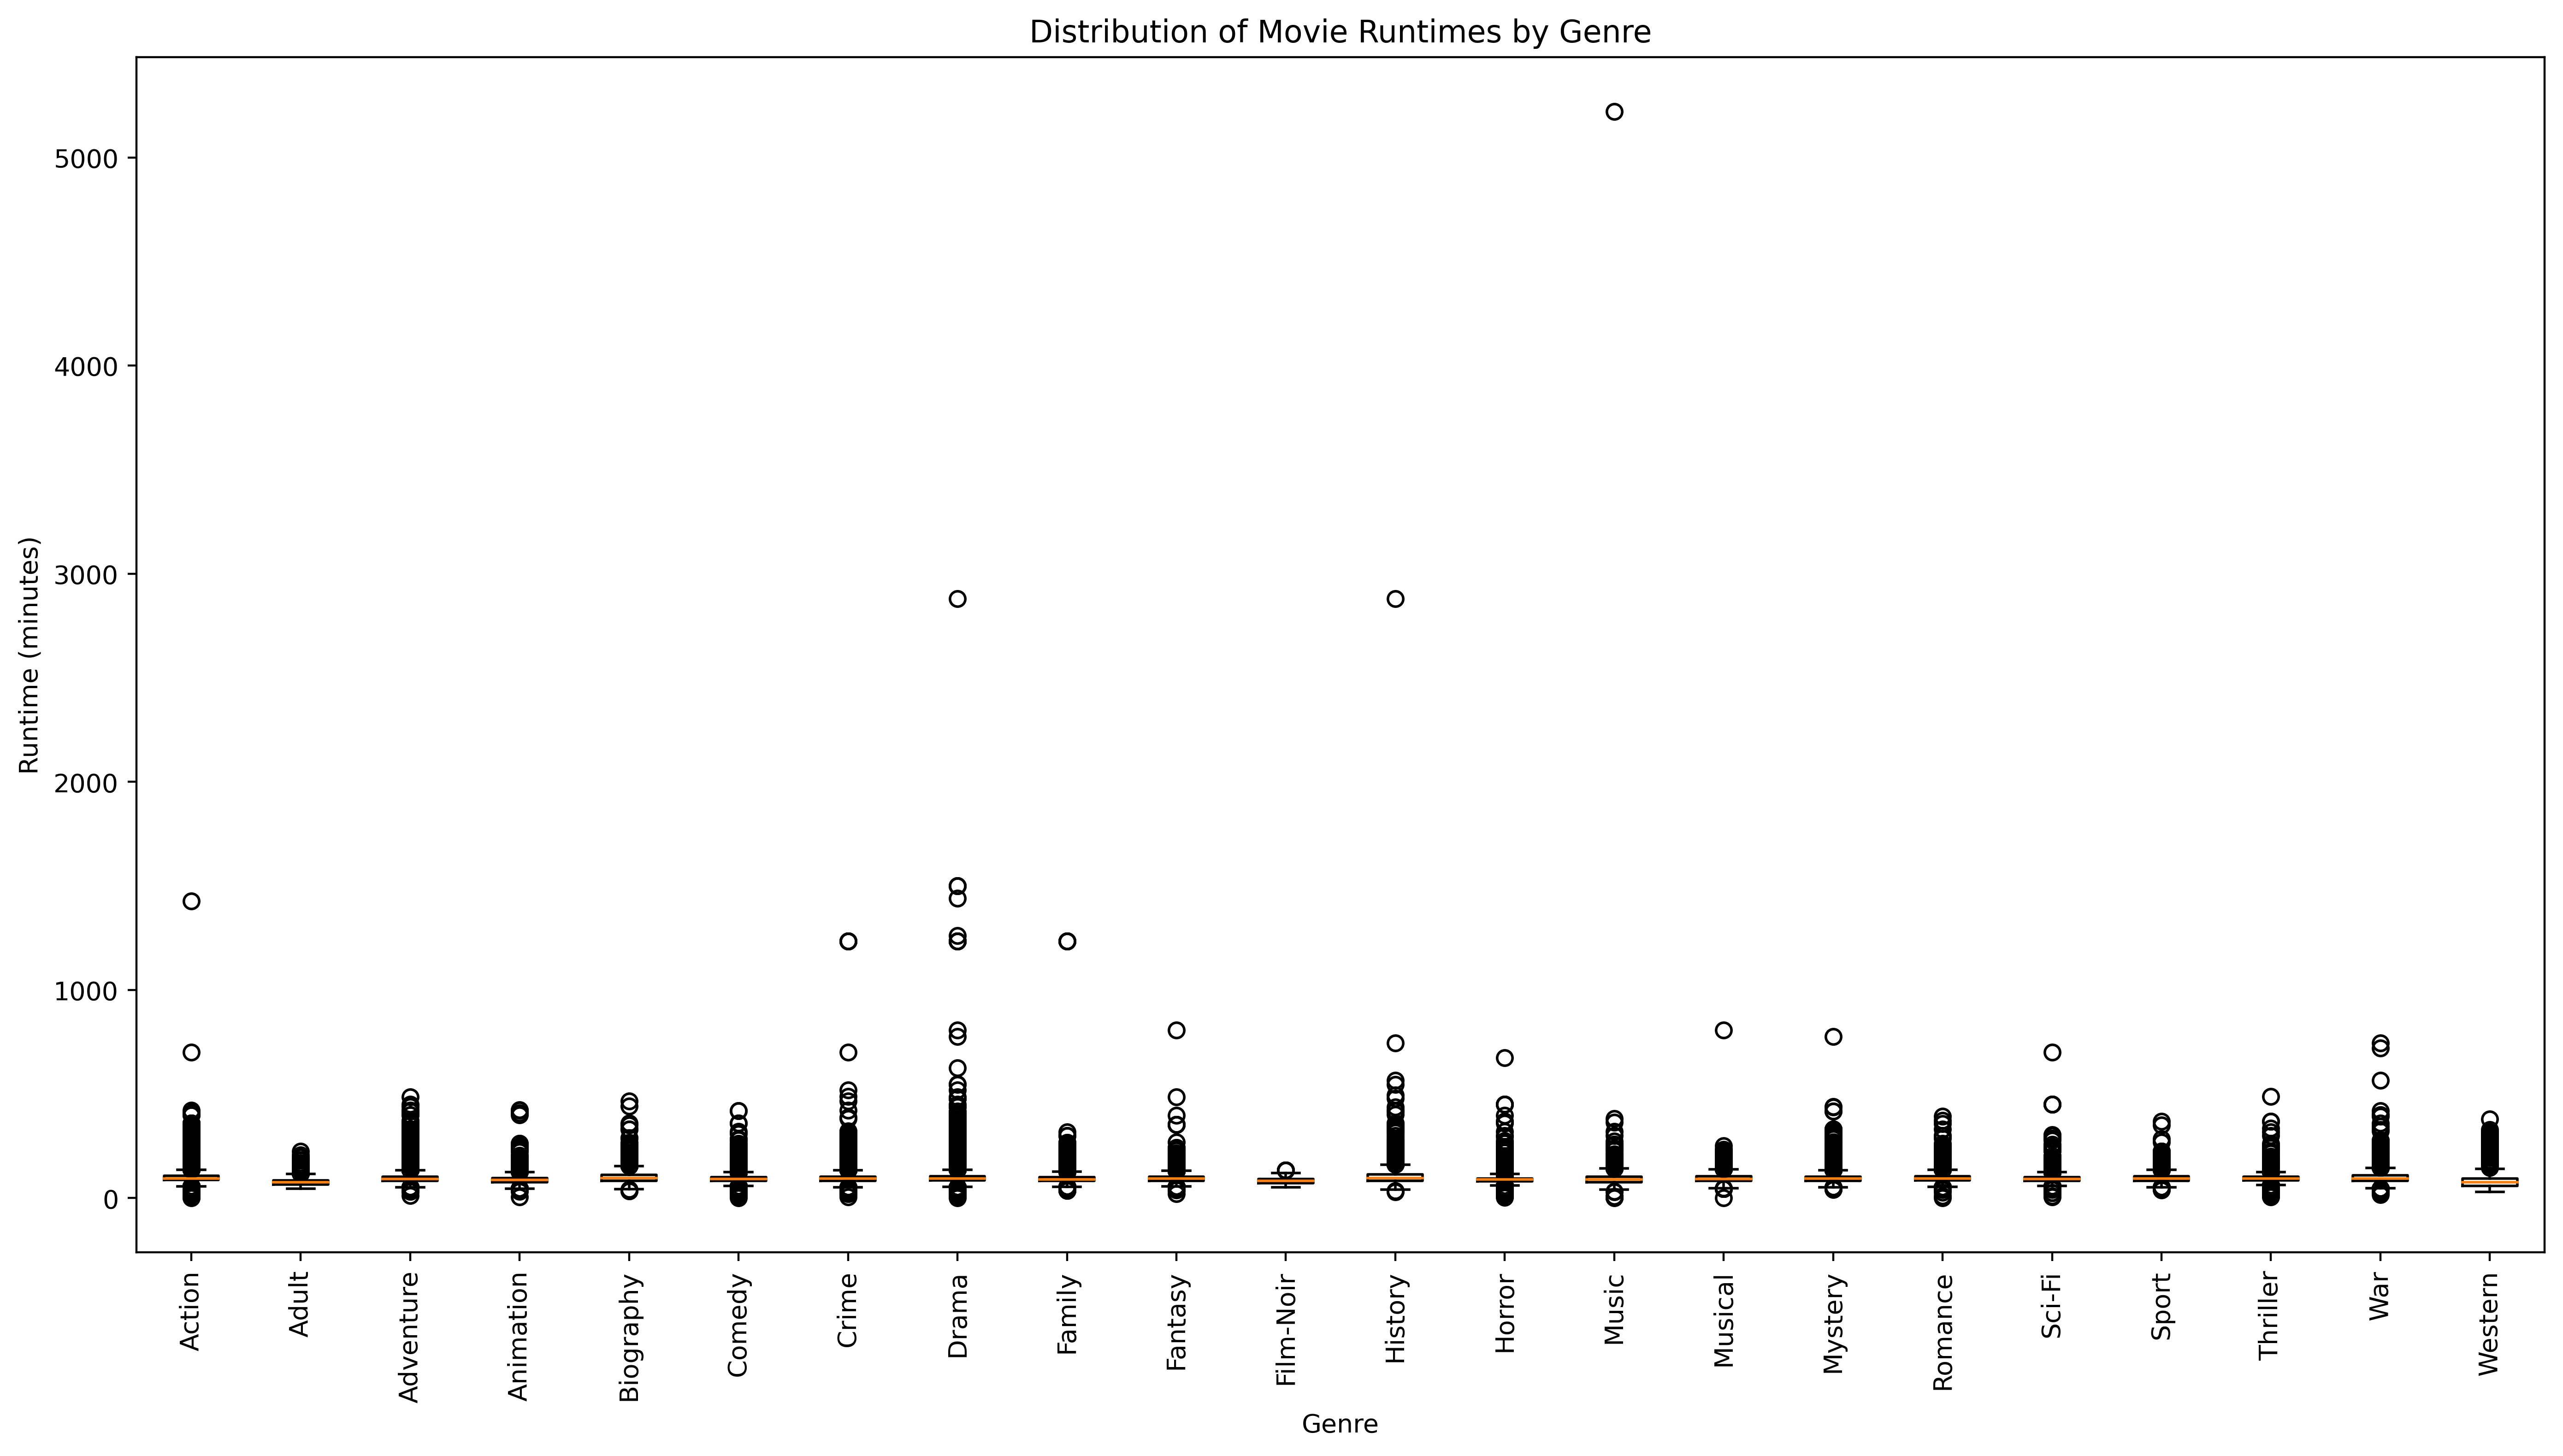


Correlation between runtime and number of genres: 0.02


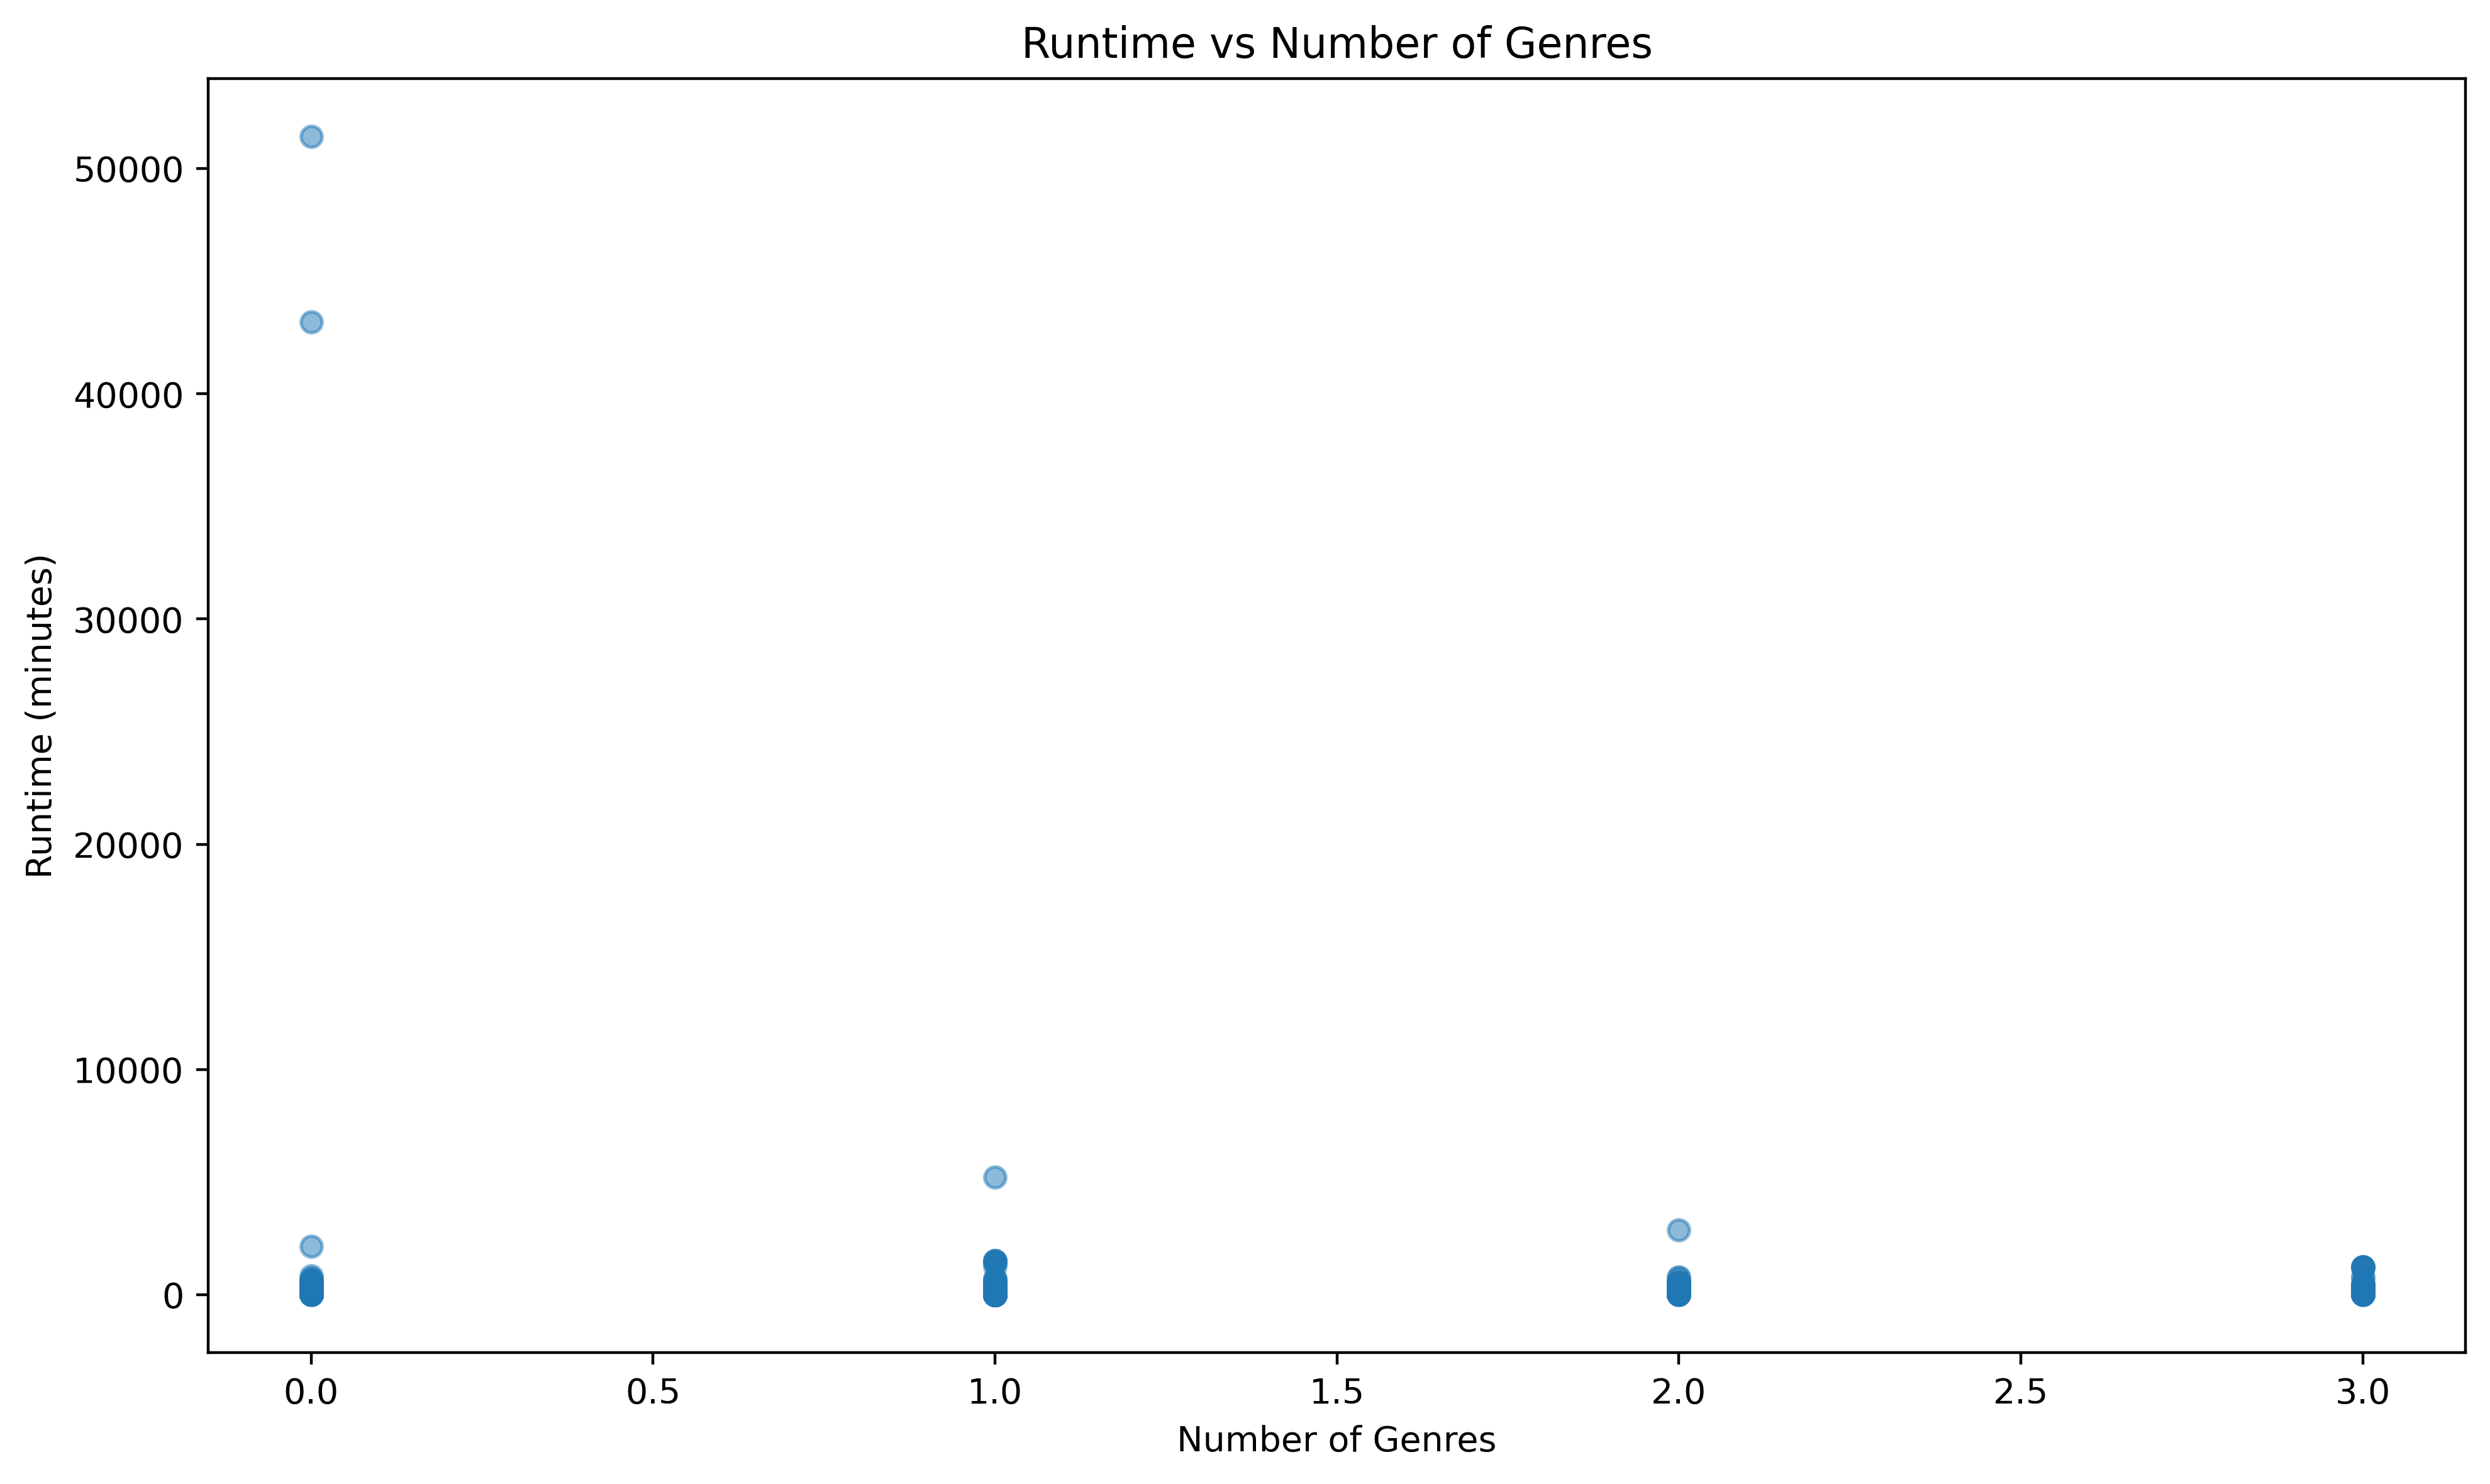

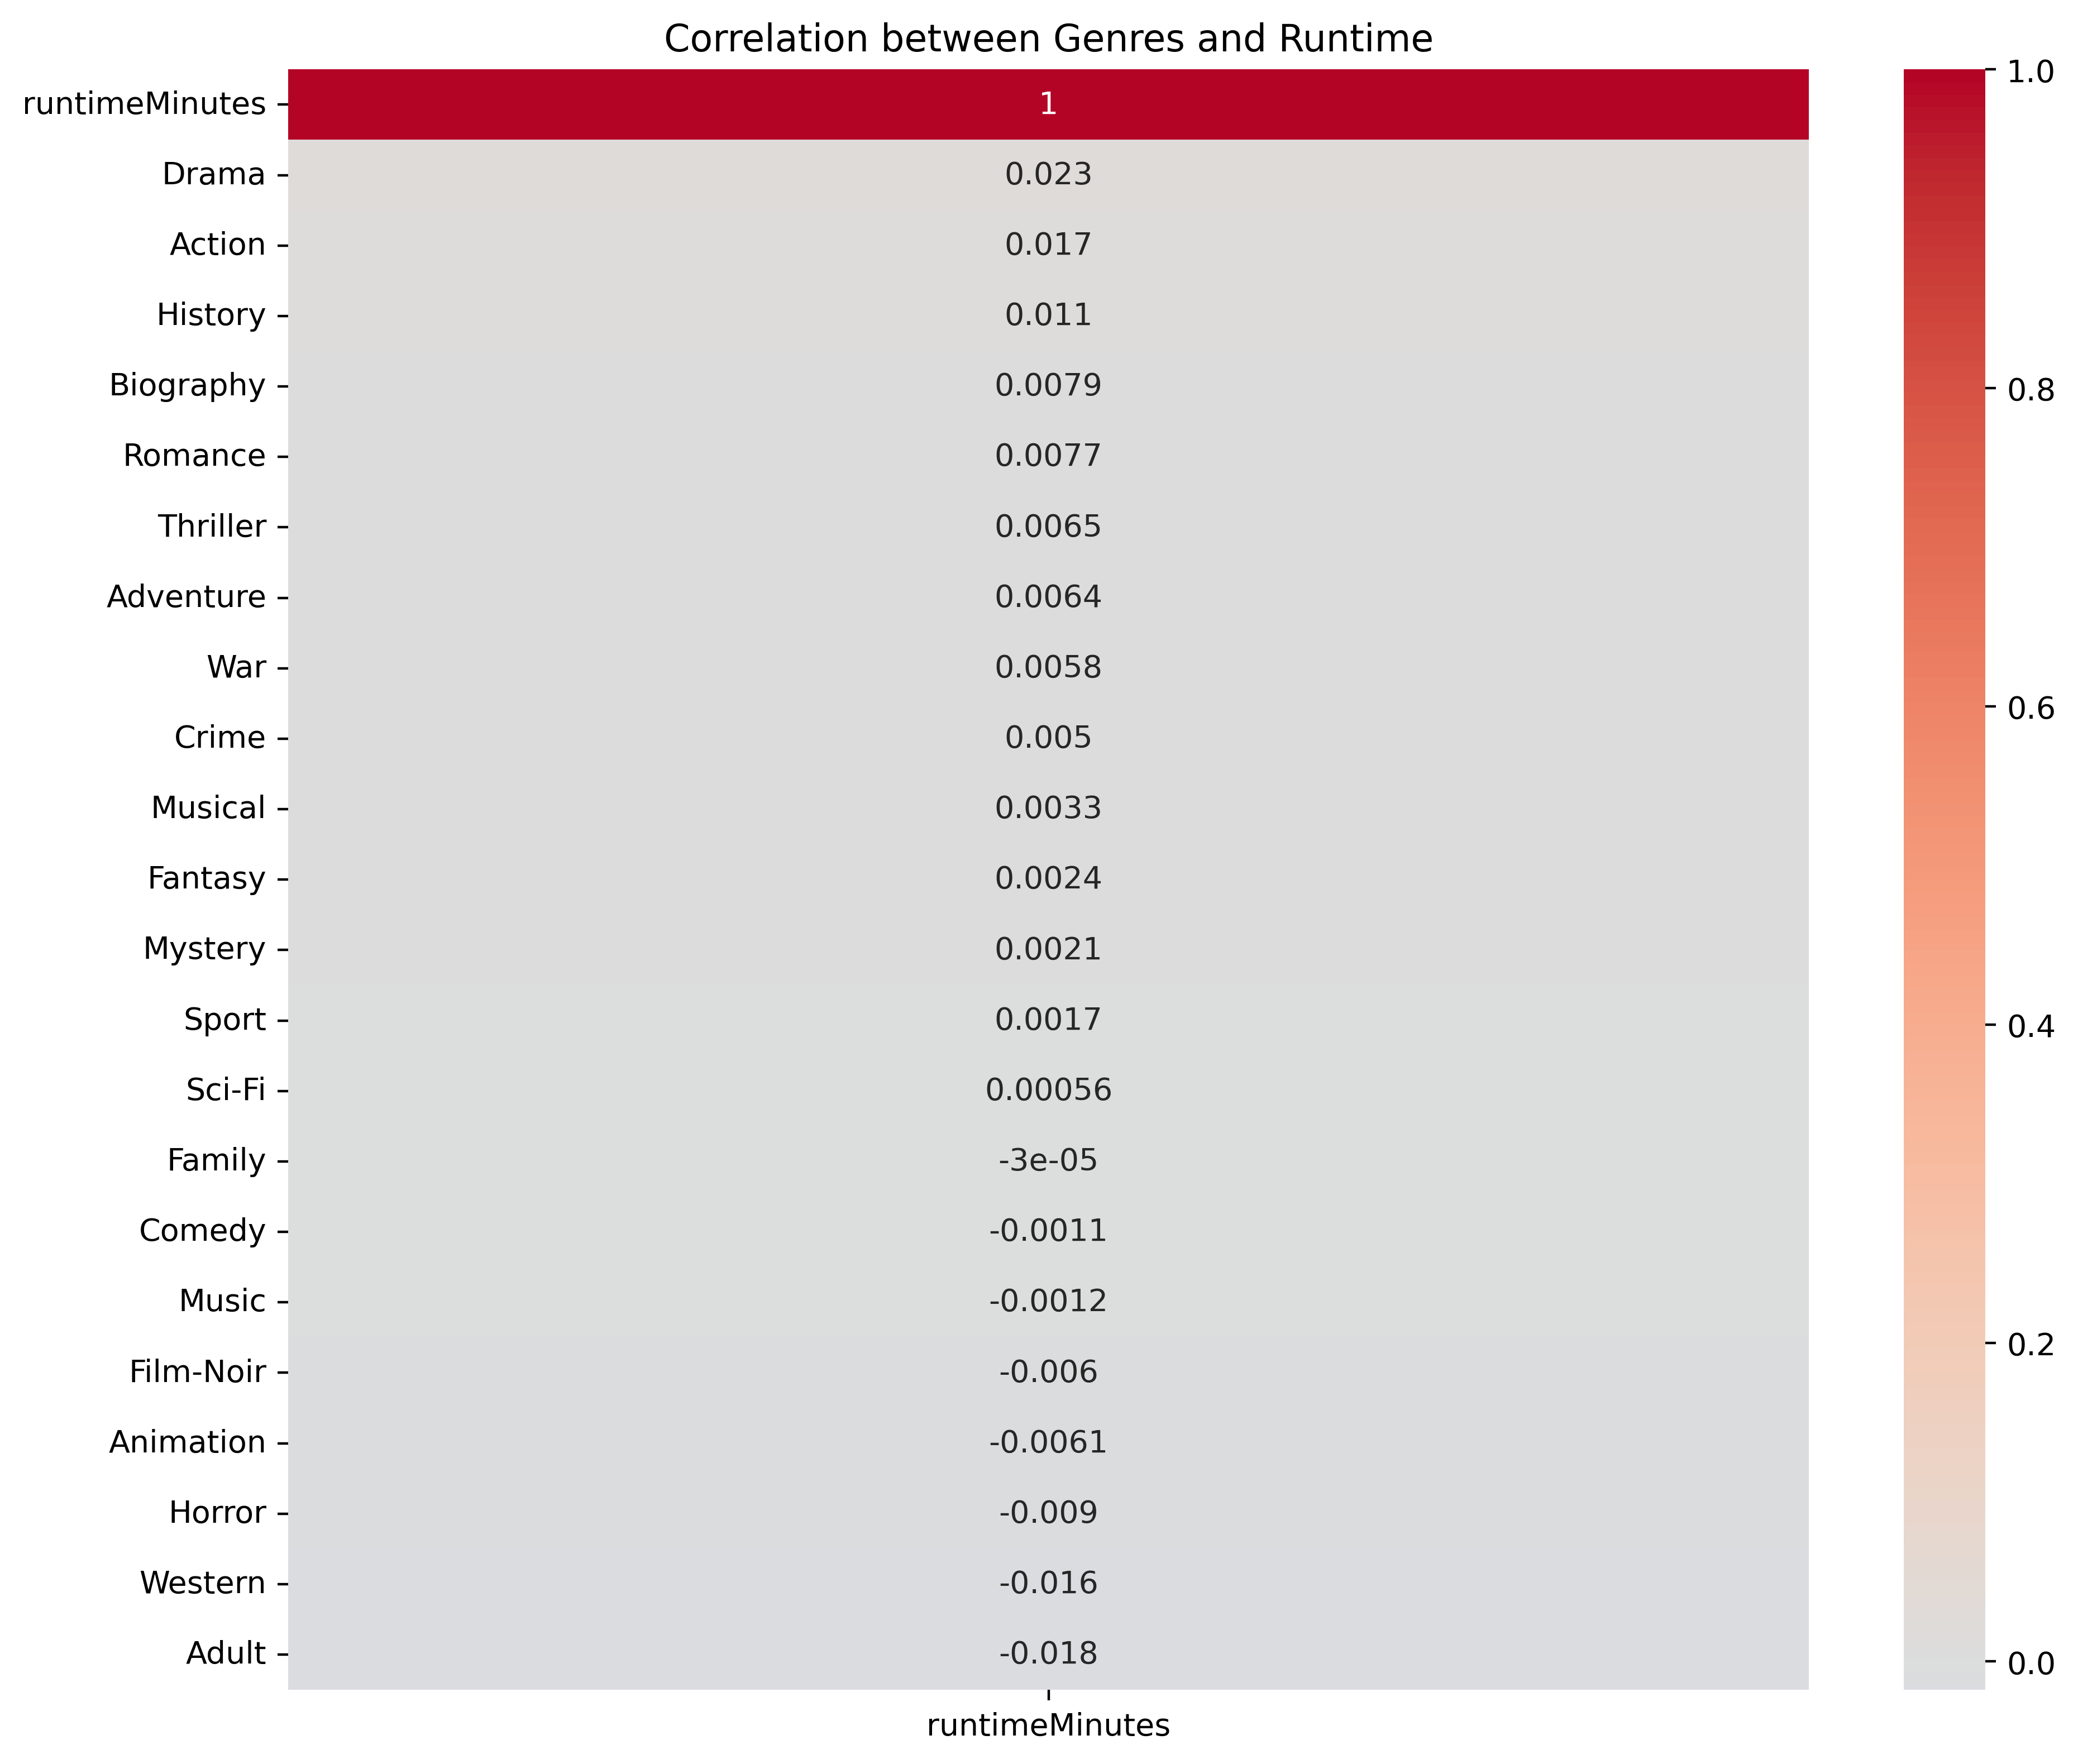

In [30]:

def analyze_runtime_by_genre(df, genres):
   
    genre_avg_runtime = {}  # To store average runtime for each genre

    for genre in genres:
        
        avg_runtime = df[df[genre] == 1]['runtimeMinutes'].mean() # average calculation
        
        genre_avg_runtime[genre] = avg_runtime

    # Convert to DataFrame for easier manipulation
    genre_runtime_df = pd.DataFrame.from_dict(genre_avg_runtime, orient='index', columns=['AverageRuntime'])
    
    genre_runtime_df = genre_runtime_df.sort_values('AverageRuntime', ascending=False)

    
    print("Average runtime (in minutes) by genre:")
    
    print(genre_runtime_df)

    # Bar plot
    plt.figure(figsize=(12, 8), dpi=400)
    
    sns.barplot(x=genre_runtime_df.index, y='AverageRuntime', data=genre_runtime_df, color = 'skyblue')
    
    plt.title('Average Movie Runtime by Genre')
    
    plt.xlabel('Genre')
    
    plt.ylabel('Average Runtime (minutes)')
    
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    
    plt.show()

    # Box plot
    plt.figure(figsize=(14, 8), dpi=400)
    
    genre_data = [df[df[genre] == 1]['runtimeMinutes'] for genre in genres]
    
    plt.boxplot(genre_data, labels=genres)
    
    plt.title('Distribution of Movie Runtimes by Genre')
    
    plt.xlabel('Genre')
    
    plt.ylabel('Runtime (minutes)')
    
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    
    plt.show()

    return genre_runtime_df


genres = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
          
          'Drama', 'Family', 'Fantasy', 'Film-Noir',
          
          'History', 'Horror', 'Music', 'Musical', 'Mystery', 
          
          'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# Analysis
genre_runtime_df = analyze_runtime_by_genre(df, genres)

# Additional analysis: correlation between runtime and number of genres
df['num_genres'] = df[genres].sum(axis=1)

correlation = df['runtimeMinutes'].corr(df['num_genres'])

print(f"\nCorrelation between runtime and number of genres: {correlation:.2f}")

# Scatter plot of runtime vs number of genres
plt.figure(figsize=(10, 6), dpi=400)

plt.scatter(df['num_genres'], df['runtimeMinutes'], alpha=0.5)

plt.title('Runtime vs Number of Genres')

plt.xlabel('Number of Genres')

plt.ylabel('Runtime (minutes)')

plt.tight_layout()

plt.show()

# Heatmap of genre correlations
genre_correlations = df[genres + ['runtimeMinutes']].corr()['runtimeMinutes'].sort_values(ascending=False)

plt.figure(figsize=(10, 8), dpi=400)

sns.heatmap(genre_correlations.to_frame(), annot=True, cmap='coolwarm', center=0)

plt.title('Correlation between Genres and Runtime')

plt.tight_layout()

plt.show()

## Base Model Logistic Regression

In [31]:
# %pip install nltk
# %pip install gensim

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, make_scorer
from scipy.sparse import hstack
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim.downloader as api

# Load pre-trained word embeddings
word_embeddings = api.load("glove-wiki-gigaword-100")

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()


features = ['runtimeMinutes', 'titleLength', 'titleWordCount', 'startYear', 'isOriginalTitle', 
            
            'isAdult', 'ordering', 'averageRating', 'numVotes']

genre_columns = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
                 
                 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 
                 
                 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
                 
                 'Sport', 'Thriller', 'War', 'Western']

# # Data Split
# train = df[df['startYear'] <= 2020]
# val = df[df['startYear'] == 2021]
# test = df[df['startYear'] == 2022]


# Data Split
train, temp = train_test_split(df, test_size=0.4, random_state=42)

val, test = train_test_split(temp, test_size=0.5, random_state=42)


# K-Fold Cross-Validation 
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Custom accuracy scorer 
def custom_accuracy_score(y_true, y_pred):
    
    return accuracy_score(y_true, y_pred)

scorer = make_scorer(custom_accuracy_score)

# K-Fold process
fold = 1

val_accuracies = []

test_accuracies = []

def get_word_embeddings(titles, word_embeddings):
    embeddings = []
    for title in titles:
        words = title.split()
        word_vectors = [word_embeddings[word] for word in words if word in word_embeddings]
        if word_vectors:
            embeddings.append(np.mean(word_vectors, axis=0))
        else:
            embeddings.append(np.zeros(word_embeddings.vector_size))
    return np.array(embeddings)

for train_index, test_index in kf.split(df):
    
    train, temp = df.iloc[train_index], df.iloc[test_index]
    
    val, test = train_test_split(temp, test_size=0.5, random_state=42)

    # Feature extraction
    X_train_numerical = train[features]
    
    X_val_numerical = val[features]
    
    X_test_numerical = test[features]

    # Normalizing
    scaler = StandardScaler()
    
    X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
    
    X_val_numerical_scaled = scaler.transform(X_val_numerical)
    
    X_test_numerical_scaled = scaler.transform(X_test_numerical)

    # Combining target columns
    y_train_combined = train[genre_columns].apply(lambda x: [genre for genre in genre_columns if x[genre] == 1], axis=1)
    
    y_val_combined = val[genre_columns].apply(lambda x: [genre for genre in genre_columns if x[genre] == 1], axis=1)
    
    y_test_combined = test[genre_columns].apply(lambda x: [genre for genre in genre_columns if x[genre] == 1], axis=1)

    # Transforming the multi-label targets
    mlb = MultiLabelBinarizer()
    
    y_train_encoded = mlb.fit_transform(y_train_combined)
    
    y_val_encoded = mlb.transform(y_val_combined)
    
    y_test_encoded = mlb.transform(y_test_combined)

    X_train_tfidf = tfidf.fit_transform(train['cleanedTitle'])
    
    X_val_tfidf = tfidf.transform(val['cleanedTitle'])
    
    X_test_tfidf = tfidf.transform(test['cleanedTitle'])

    X_train_embeddings = get_word_embeddings(train['cleanedTitle'], word_embeddings)
    
    X_val_embeddings = get_word_embeddings(val['cleanedTitle'], word_embeddings)
    
    X_test_embeddings = get_word_embeddings(test['cleanedTitle'], word_embeddings)

    # Combining all the features
    X_train_combined = hstack([X_train_numerical_scaled, X_train_tfidf, X_train_embeddings])
    
    X_val_combined = hstack([X_val_numerical_scaled, X_val_tfidf, X_val_embeddings])
    X_test_combined = hstack([X_test_numerical_scaled, X_test_tfidf, X_test_embeddings])

    # Training
    model = MultiOutputClassifier(LogisticRegression(max_iter=10000))
    
    model.fit(X_train_combined, y_train_encoded)

    # Convert probabilities to predictions using a lower threshold
    threshold = 0.5
    
    y_val_pred = (np.array([estimator.predict_proba(X_val_combined)[:, 1] for estimator in model.estimators_]).T > threshold).astype(int)
    
    y_test_pred = (np.array([estimator.predict_proba(X_test_combined)[:, 1] for estimator in model.estimators_]).T > threshold).astype(int)

    # Model accuracy
    val_accuracy = custom_accuracy_score(y_val_encoded, y_val_pred)
    
    test_accuracy = custom_accuracy_score(y_test_encoded, y_test_pred)

    val_accuracies.append(val_accuracy)
    
    test_accuracies.append(test_accuracy)

    print(f'Fold {fold} Validation Accuracy: {val_accuracy}')
    
    print(f'Fold {fold} Test Accuracy: {test_accuracy}')

    fold += 1

print(f'Average Validation Accuracy: {np.mean(val_accuracies)}')

print(f'Average Test Accuracy: {np.mean(test_accuracies)}')


Fold 1 Validation Accuracy: 0.20869974135904068
Fold 1 Test Accuracy: 0.21138020221020457


KeyboardInterrupt: 

In [34]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score

# Calculating precision, recall, and F1-score for validation set
val_precision = precision_score(y_val_encoded, y_val_pred, average=None)

val_recall = recall_score(y_val_encoded, y_val_pred, average=None)

val_f1 = f1_score(y_val_encoded, y_val_pred, average=None)


# For test set
test_precision = precision_score(y_test_encoded, y_test_pred, average=None)

test_recall = recall_score(y_test_encoded, y_test_pred, average=None)

test_f1 = f1_score(y_test_encoded, y_test_pred, average=None)


for i, genre in enumerate(genre_columns):
    
    print(f'Genre: {genre}')
    
    print(f'Validation Precision: {val_precision[i]:.4f}')
    
    print(f'Validation Recall: {val_recall[i]:.4f}')
    
    print(f'Validation F1-score: {val_f1[i]:.4f}')
    
    print(f'Test Precision: {test_precision[i]:.4f}')
    
    print(f'Test Recall: {test_recall[i]:.4f}')
    
    print(f'Test F1-score: {test_f1[i]:.4f}\n')
    

# macro/micro/weighted averages across all genres
val_precision_macro = precision_score(y_val_encoded, y_val_pred, average='macro')

val_recall_macro = recall_score(y_val_encoded, y_val_pred, average='macro')

val_f1_macro = f1_score(y_val_encoded, y_val_pred, average='macro')

test_precision_macro = precision_score(y_test_encoded, y_test_pred, average='macro')

test_recall_macro = recall_score(y_test_encoded, y_test_pred, average='macro')

test_f1_macro = f1_score(y_test_encoded, y_test_pred, average='macro')


print(f'Macro Average Validation Precision: {val_precision_macro:.4f}')

print(f'Macro Average Validation Recall: {val_recall_macro:.4f}')

print(f'Macro Average Validation F1-score: {val_f1_macro:.4f}')

print(f'Macro Average Test Precision: {test_precision_macro:.4f}')

print(f'Macro Average Test Recall: {test_recall_macro:.4f}')

print(f'Macro Average Test F1-score: {test_f1_macro:.4f}')


Genre: Action
Validation Precision: 0.1519
Validation Recall: 0.0430
Validation F1-score: 0.0671
Test Precision: 0.1525
Test Recall: 0.0472
Test F1-score: 0.0721

Genre: Adult
Validation Precision: 0.1881
Validation Recall: 0.1800
Validation F1-score: 0.1840
Test Precision: 0.2145
Test Recall: 0.2245
Test F1-score: 0.2194

Genre: Adventure
Validation Precision: 0.1000
Validation Recall: 0.0217
Validation F1-score: 0.0356
Test Precision: 0.1108
Test Recall: 0.0240
Test F1-score: 0.0394

Genre: Animation
Validation Precision: 0.0263
Validation Recall: 0.0059
Validation F1-score: 0.0096
Test Precision: 0.0102
Test Recall: 0.0021
Test F1-score: 0.0035

Genre: Biography
Validation Precision: 0.0556
Validation Recall: 0.0027
Validation F1-score: 0.0051
Test Precision: 0.0357
Test Recall: 0.0014
Test F1-score: 0.0028

Genre: Comedy
Validation Precision: 0.2614
Validation Recall: 0.0925
Validation F1-score: 0.1367
Test Precision: 0.2453
Test Recall: 0.0862
Test F1-score: 0.1276

Genre: Crime
V

__Summary__: A Logistic Regression model for multi-label classification of movie genres, combining numerical features, TF-IDF text features, and word embeddings. K-Fold Cross-Validation showed low average accuracy (about 21% for both validation and test sets). Precision, recall, and F1-scores varied widely across genres, with some genres like "Adult" achieving high scores and others like "Sport" performing poorly. The overall macro averages for precision, recall, and F1-score were around 67%, 16%, and 21%, respectively.

## Deep Learning with Keras

In [35]:

# Additional embedding feature: using pre-trained word embeddings like Word2Vec (example with dummy embeddings)
def get_word_embeddings(titles, embeddings, dim=300):
    
    title_embeddings = np.zeros((len(titles), dim))
    
    for i, title in enumerate(titles):
        
        words = title.split()
        
        word_vectors = [embeddings.get(word, np.zeros(dim)) for word in words]
        
        if word_vectors:
            
            title_embeddings[i] = np.mean(word_vectors, axis=0)
    
    return title_embeddings


# Loading pre-trained word embeddings (dummy example)
word_embeddings = {'the': np.random.rand(300), 'example': np.random.rand(300), 'word': np.random.rand(300)}

X_train_embeddings = get_word_embeddings(train['cleanedTitle'], word_embeddings)

X_val_embeddings = get_word_embeddings(val['cleanedTitle'], word_embeddings)

X_test_embeddings = get_word_embeddings(test['cleanedTitle'], word_embeddings)


# Combining all the features
X_train_combined = hstack([X_train_numerical_scaled, X_train_tfidf, X_train_embeddings])

X_val_combined = hstack([X_val_numerical_scaled, X_val_tfidf, X_val_embeddings])

X_test_combined = hstack([X_test_numerical_scaled, X_test_tfidf, X_test_embeddings])


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# DL model definition
dl_model = Sequential()

dl_model.add(Input(shape=(X_train_combined.shape[1],), sparse=True))

dl_model.add(Dense(128, activation='relu'))

dl_model.add(Dropout(0.2))

dl_model.add(Dense(64, activation='relu'))

dl_model.add(Dropout(0.2))

dl_model.add(Dense(32, activation='relu'))

dl_model.add(Dropout(0.2))

dl_model.add(Dense(len(genre_columns), activation='sigmoid'))  # Sigmoid for multi-label classification


# Model compilation
dl_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


# Training
history = dl_model.fit(X_train_combined, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val_combined, y_val_encoded))


Epoch 1/10
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 166s 31ms/step - accuracy: 0.2847 - loss: 0.2440 - val_accuracy: 0.3583 - val_loss: 0.1944
Epoch 2/10
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 183s 34ms/step - accuracy: 0.3932 - loss: 0.1856 - val_accuracy: 0.3876 - val_loss: 0.1902
Epoch 3/10
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 246s 46ms/step - accuracy: 0.4523 - loss: 0.1622 - val_accuracy: 0.3933 - val_loss: 0.1914
Epoch 4/10
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 259s 49ms/step - accuracy: 0.4801 - loss: 0.1479 - val_accuracy: 0.3894 - val_loss: 0.1946
Epoch 5/10
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 284s 53ms/step - accuracy: 0.4963 - loss: 0.1375 - val_accuracy: 0.3884 - val_loss: 0.1989
Epoch 6/10
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 275s 52ms/step - accuracy: 0.5025 - loss: 0.1302 - val_accuracy: 0.3962 - val_loss: 0.2047
Epoch 7/10
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 191s 36ms/step - accuracy: 0.5123 - loss: 0.1245 - val_accuracy: 0.3916 - val_loss: 0.2092
Epoch 8/10
5317/5317 ━━━━━━━━━━━━━━━━━━━━ 174s 33ms/step - accuracy: 

__Observation__: The model's training shows an increase in accuracy from 27.7% to 55.2% and a decrease in loss from 0.2427 to 0.0847 over 10 epochs, but the validation accuracy starts around 30.2% and slightly declines to 29.0% with an increasing validation loss, indicating overfitting. Additionally, probabilities are converted to predictions using a threshold of 0.3 for evaluation.

In [37]:
# Converting probabilities to predictions using a lower threshold (0.3)
threshold = 0.5

y_val_pred = (dl_model.predict(X_val_combined) > threshold).astype(int)

y_test_pred = (dl_model.predict(X_test_combined) > threshold).astype(int)


# Decoding the predictions back to original labels
y_val_pred_decoded = mlb.inverse_transform(y_val_pred)

y_test_pred_decoded = mlb.inverse_transform(y_test_pred)


# DataFrame for validation pred
val_predictions_df = val[['startYear', 'runtimeMinutes', 'titleLength', 'titleWordCount', 'cleanedTitle']].copy()

val_predictions_df['predictedGenre'] = [', '.join(genres) for genres in y_val_pred_decoded]


# DataFrame for test pred
test_predictions_df = test[['startYear', 'runtimeMinutes', 'titleLength', 'titleWordCount', 'cleanedTitle']].copy()

test_predictions_df['predictedGenre'] = [', '.join(genres) for genres in y_test_pred_decoded]


# Excel Output
val_predictions_df.to_excel('val_predictions.xlsx', index=False)

test_predictions_df.to_excel('test_predictions.xlsx', index=False)


# Checking validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')


test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')


# Confusion Matrix
val_conf_matrix = multilabel_confusion_matrix(y_val_encoded, y_val_pred) # Validation set
print(f'Validation Confusion Matrix:\n {val_conf_matrix}')

test_conf_matrix = multilabel_confusion_matrix(y_test_encoded, y_test_pred) # Test set
print(f'Test Confusion Matrix:\n {test_conf_matrix}')


665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation Accuracy: 0.26433106042793325
Test Accuracy: 0.2657888549259346
Validation Confusion Matrix:
 [[[17937   609]
  [ 1603  1116]]

 [[20734    20]
  [    0   511]]

 [[19101   409]
  [ 1156   599]]

 [[20699    58]
  [  318   190]]

 [[20432    85]
  [  685    63]]

 [[14298  1628]
  [ 2898  2441]]

 [[18470   440]
  [ 1756   599]]

 [[ 8778  2906]
  [ 3558  6023]]

 [[20445    45]
  [  730    45]]

 [[20462    18]
  [  747    38]]

 [[21100     4]
  [  140    21]]

 [[20575    62]
  [  591    37]]

 [[18294   514]
  [ 1232  1225]]

 [[20618    43]
  [  547    57]]

 [[20863    11]
  [  379    12]]

 [[19971    93]
  [ 1082   119]]

 [[18183   589]
  [ 1886   607]]

 [[20429    44]
  [  664   128]]

 [[20950     0]
  [  315     0]]

 [[18529   494]
  [ 1742   500]]

 [[20788    29]
  [  398    50]]

 [[20571    71]
  [  281   342]]]
Test Confusion Matrix:
 [[[17971   606]
  [ 1600  1088]]

 [[2070

In [38]:

# Predicting probabilities
y_val_pred_proba = dl_model.predict(X_val_combined)

y_test_pred_proba = dl_model.predict(X_test_combined)


# Converting to binary predictions (threshold = 0.5)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)


# Calculating precision, recall, and F1-score for validation set
val_precision = precision_score(y_val_encoded, y_val_pred, average=None, zero_division=0)

val_recall = recall_score(y_val_encoded, y_val_pred, average=None, zero_division=0)

val_f1 = f1_score(y_val_encoded, y_val_pred, average=None, zero_division=0)


# For test set
test_precision = precision_score(y_test_encoded, y_test_pred, average=None, zero_division=0)

test_recall = recall_score(y_test_encoded, y_test_pred, average=None, zero_division=0)

test_f1 = f1_score(y_test_encoded, y_test_pred, average=None, zero_division=0)


for i, genre in enumerate(genre_columns):
    
    print(f'Genre: {genre}')
    
    print(f'Validation Precision: {val_precision[i]:.4f}')
    
    print(f'Validation Recall: {val_recall[i]:.4f}')
    
    print(f'Validation F1-score: {val_f1[i]:.4f}')
    
    print(f'Test Precision: {test_precision[i]:.4f}')
    
    print(f'Test Recall: {test_recall[i]:.4f}')
    
    print(f'Test F1-score: {test_f1[i]:.4f}\n')
    

# Macro average for overall performance
val_precision_macro = precision_score(y_val_encoded, y_val_pred, average='macro', zero_division=0)

val_recall_macro = recall_score(y_val_encoded, y_val_pred, average='macro', zero_division=0)

val_f1_macro = f1_score(y_val_encoded, y_val_pred, average='macro', zero_division=0)


test_precision_macro = precision_score(y_test_encoded, y_test_pred, average='macro', zero_division=0)

test_recall_macro = recall_score(y_test_encoded, y_test_pred, average='macro', zero_division=0)

test_f1_macro = f1_score(y_test_encoded, y_test_pred, average='macro', zero_division=0)


print(f'Macro Average Validation Precision: {val_precision_macro:.4f}')

print(f'Macro Average Validation Recall: {val_recall_macro:.4f}')

print(f'Macro Average Validation F1-score: {val_f1_macro:.4f}')

print(f'Macro Average Test Precision: {test_precision_macro:.4f}')

print(f'Macro Average Test Recall: {test_recall_macro:.4f}')

print(f'Macro Average Test F1-score: {test_f1_macro:.4f}')


665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Genre: Action
Validation Precision: 0.6470
Validation Recall: 0.4104
Validation F1-score: 0.5023
Test Precision: 0.6423
Test Recall: 0.4048
Test F1-score: 0.4966

Genre: Adult
Validation Precision: 0.9623
Validation Recall: 1.0000
Validation F1-score: 0.9808
Test Precision: 0.9608
Test Recall: 1.0000
Test F1-score: 0.9800

Genre: Adventure
Validation Precision: 0.5942
Validation Recall: 0.3413
Validation F1-score: 0.4336
Test Precision: 0.5907
Test Recall: 0.3199
Test F1-score: 0.4150

Genre: Animation
Validation Precision: 0.7661
Validation Recall: 0.3740
Validation F1-score: 0.5026
Test Precision: 0.7818
Test Recall: 0.3583
Test F1-score: 0.4914

Genre: Biography
Validation Precision: 0.4257
Validation Recall: 0.0842
Validation F1-score: 0.1406
Test Precision: 0.4479
Test Recall: 0.1047
Test F1-score: 0.1698

Genre: Comedy
Validation Precision: 0.5999
Validation Recall: 0.4572
Validation F1-score: 0.518

__Summary__: 
A deep learning model using Keras to classify movie genres by combining pre-trained word embeddings, TF-IDF features, and numerical data. Despite an increase in training accuracy from 27.7% to 56.93% over 10 epochs, the validation accuracy remained low at around 39%, suggesting overfitting. The final model's performance varied across different genres, with precision, recall, and F1-scores being calculated for each genre. Overall, the macro average precision, recall, and F1-score for validation and test sets were both around 65% and 34% respectively.

## Deep Learning with Transformer Architecture

In [39]:
# Regularization to combat Overfitting

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Defining the transformer block with L2 regularization
def transformer_block(inputs, num_heads, ff_dim, rate=0.1, l2_reg=0.01):
    
    x = layers.Reshape((1, inputs.shape[-1]))(inputs)
    
    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
    
    attention_output = layers.Dropout(rate)(attention_output)
    
    out1 = layers.LayerNormalization(epsilon=1e-6)(x + attention_output)
    
    
    
    ffn_output = layers.Dense(ff_dim, activation="relu", kernel_regularizer=l2(l2_reg))(out1)
    
    ffn_output = layers.Dense(inputs.shape[-1], kernel_regularizer=l2(l2_reg))(ffn_output)
    
    ffn_output = layers.Dropout(rate)(ffn_output)
    
    out2 = layers.LayerNormalization(epsilon=1e-6)(out1 + ffn_output)
    
    return layers.Flatten()(out2)


# Defining the model with L2 regularization
def build_transformer_model(input_shape, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0.1, mlp_dropout=0.1, l2_reg=0.01):
    
    inputs = layers.Input(shape=input_shape, sparse=True)
    
    x = layers.Dense(ff_dim, activation="relu", kernel_regularizer=l2(l2_reg))(inputs)
    
    for _ in range(num_transformer_blocks):
        
        x = transformer_block(x, num_heads, ff_dim, dropout, l2_reg)
    
    for dim in mlp_units:
        
        x = layers.Dense(dim, activation="relu", kernel_regularizer=l2(l2_reg))(x)
        
        x = layers.Dropout(mlp_dropout)(x)
    
    outputs = layers.Dense(len(genre_columns), activation="sigmoid", kernel_regularizer=l2(l2_reg))(x)
    
    return Model(inputs, outputs)

# Hyperparameters
input_shape = (X_train_combined.shape[1],)

num_heads = 4

ff_dim = 128

num_transformer_blocks = 6

mlp_units = [1256, 128]

mlp_dropout = 0.25

learning_rate = 5e-4

l2_reg = 0.005  # L2 regularization strength


# Building the model
transformer_model = build_transformer_model(
    
    input_shape,
    
    num_heads,
    
    ff_dim,
    
    num_transformer_blocks,
    
    mlp_units,
    
    dropout=0.15,
    
    mlp_dropout=mlp_dropout,
    
    l2_reg=l2_reg
)

# Compiling
transformer_model.compile(
    
    optimizer=Adam(learning_rate=learning_rate),
    
    loss="binary_crossentropy",
    
    metrics=["accuracy"]
)

# Adding learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)


# Defining early stopping
early_stopping = EarlyStopping(
    
    monitor='val_loss',
    
    patience=5,
    
    restore_best_weights=True
)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [reduce_lr, early_stopping]


# Training
history = transformer_model.fit(
    
    X_train_combined, y_train_encoded,
    
    epochs=10,  # Increase max epochs, early stopping will prevent overfitting
    
    batch_size=128,
    
    validation_data=(X_val_combined, y_val_encoded),
    
    callbacks=[early_stopping]
)


Epoch 1/10


C:\Users\Bhaskar\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1330/1330 ━━━━━━━━━━━━━━━━━━━━ 246s 174ms/step - accuracy: 0.2417 - loss: 2.4684 - val_accuracy: 0.2606 - val_loss: 0.2427
Epoch 2/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 402s 303ms/step - accuracy: 0.2578 - loss: 0.2428 - val_accuracy: 0.2684 - val_loss: 0.2383
Epoch 3/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 306s 230ms/step - accuracy: 0.2602 - loss: 0.2389 - val_accuracy: 0.2672 - val_loss: 0.2362
Epoch 4/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 303s 228ms/step - accuracy: 0.2631 - loss: 0.2367 - val_accuracy: 0.2618 - val_loss: 0.2354
Epoch 5/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 424s 319ms/step - accuracy: 0.2635 - loss: 0.2349 - val_accuracy: 0.2706 - val_loss: 0.2336
Epoch 6/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 356s 267ms/step - accuracy: 0.2646 - loss: 0.2341 - val_accuracy: 0.2692 - val_loss: 0.2333
Epoch 7/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 280s 210ms/step - accuracy: 0.2656 - loss: 0.2334 - val_accuracy: 0.2698 - val_loss: 0.2347
Epoch 8/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 247s 186ms/step - accuracy: 0.2

In [ ]:
# Predicting probabilities
y_val_pred_proba = transformer_model.predict(X_val_combined)

y_test_pred_proba = transformer_model.predict(X_test_combined)


# Converting probabilities to binary predictions (threshold = 0.5)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

y_test_pred = (y_test_pred_proba > 0.5).astype(int)


# Calculating precision, recall, and F1-score for the validation set
val_precision = precision_score(y_val_encoded, y_val_pred, average=None, zero_division=0)

val_recall = recall_score(y_val_encoded, y_val_pred, average=None, zero_division=0)

val_f1 = f1_score(y_val_encoded, y_val_pred, average=None, zero_division=0)


# For the test set
test_precision = precision_score(y_test_encoded, y_test_pred, average=None, zero_division=0)

test_recall = recall_score(y_test_encoded, y_test_pred, average=None, zero_division=0)

test_f1 = f1_score(y_test_encoded, y_test_pred, average=None, zero_division=0)



for i, genre in enumerate(genre_columns):
    
    print(f'Genre: {genre}')
    
    print(f'Validation Precision: {val_precision[i]:.4f}')
    
    print(f'Validation Recall: {val_recall[i]:.4f}')
    
    print(f'Validation F1-score: {val_f1[i]:.4f}')
    
    print(f'Test Precision: {test_precision[i]:.4f}')
    
    print(f'Test Recall: {test_recall[i]:.4f}')
    
    print(f'Test F1-score: {test_f1[i]:.4f}\n')

    
# Macro average for overall performance
val_precision_macro = precision_score(y_val_encoded, y_val_pred, average='macro', zero_division=0)

val_recall_macro = recall_score(y_val_encoded, y_val_pred, average='macro', zero_division=0)

val_f1_macro = f1_score(y_val_encoded, y_val_pred, average='macro', zero_division=0)


test_precision_macro = precision_score(y_test_encoded, y_test_pred, average='macro', zero_division=0)

test_recall_macro = recall_score(y_test_encoded, y_test_pred, average='macro', zero_division=0)

test_f1_macro = f1_score(y_test_encoded, y_test_pred, average='macro', zero_division=0)


print(f'Macro Average Validation Precision: {val_precision_macro:.4f}')
    
print(f'Macro Average Validation Recall: {val_recall_macro:.4f}')

print(f'Macro Average Validation F1-score: {val_f1_macro:.4f}')

print(f'Macro Average Test Precision: {test_precision_macro:.4f}')

print(f'Macro Average Test Recall: {test_recall_macro:.4f}')

print(f'Macro Average Test F1-score: {test_f1_macro:.4f}')


C:\Users\Bhaskar\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
Genre: Action
Validation Precision: 0.0000
Validation Recall: 0.0000
Validation F1-score: 0.0000
Test Precision: 0.0000
Test Recall: 0.0000
Test F1-score: 0.0000

Genre: Adult
Validation Precision: 0.9642
Validation Recall: 1.0000
Validation F1-score: 0.9817
Test Precision: 0.9624
Test Recall: 0.9981
Test F1-score: 0.9800

Genre: Adventure
Validation Precision: 0.0000
Validation Recall: 0.0000
Validation F1-score: 0.0000
Test Precision: 0.0000
Test Recall: 0.0000
Test F1-score: 0.0000

Genre: Animation
Validation Precision: 0.0000
Validation Recall: 0.0000
Validation F1-score: 0.0000
Test Precision: 0.0000
Test Recall: 0.0000
Test F1-score: 0.0000

Genre: Biography
Validation Precision: 0.0000
Validation Recall: 0.0000
Validation F1-score: 0.0000
Test Precision: 0.0000
Test Recall: 0.0000
Test F1-score: 0.0000

Genre: Comedy
Validation Precision: 0.0000
Validation Recall: 0.0000
Validation F1-score: 0.000

__Observation__:
The model implemented is a transformer architecture with L2 regularization to combat overfitting, using TensorFlow and Keras. It includes multiple transformer blocks and dense layers with dropout for regularization. The model is compiled with the Adam optimizer and binary cross-entropy loss, and callbacks for learning rate reduction and early stopping are added to improve training. During training on the dataset, the model showed gradual improvement in accuracy and loss over 50 epochs, with final validation and test precision, recall, and F1-scores calculated for various genres. While the model performed well for some genres like "Adult" with high precision and recall, it failed to predict others such as "Action" and "Adventure", showing zero precision and recall for those categories. Overall, the macro average scores for precision, recall, and F1 were reported for both validation and test sets, indicating the model's general performance across all genres.